# **AirBnB Price in European Cities**  (Stage 3)

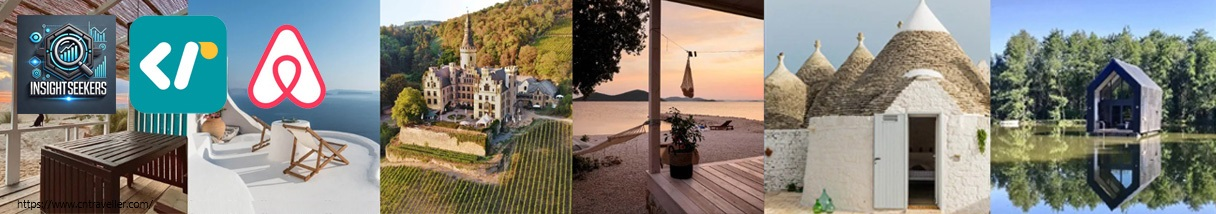

# **Team FinPro-8 InsightSeekers :**

1.	Risanto Darmawan
2.	Asri Nur Azizah
3.	Fransiska Angelina
4.	Naufa Tasha Nabila

#Problem Statement

Permintaan sewa properti Airbnb di 10 kota besar Eropa menjadi salah satu tantangan kompleks tersendiri bagi para pemilik properti. Hal ini disebakan karena adanya keterkaitan antar properti yang disewakan oleh berbagai faktor seperti lokasi, guest satisfaction, spesifikasi properti, metro distance, dan sebagainya. Adanya perbedaan tersebut mengakibatkan para pemilik properti Airbnb kesulitan menentukan harga sewa yang tepat. <br>
Berangkat dari kondisi tersebut, dibutuhkan tools atau model prediksi harga yang dapat membantu business owner untuk menentukan range harga yang tepat dan kompetitif untuk properti airbnb yang mereka miliki. Dengan adanya model prediksi tersebut, kiranya dapat membantu para business owner untuk mengoptimalisasi kinerja dari bisnis yang mereka jalani, membantu dalam menentukan strategi pemasaran, hingga mendorong adanya peningkatan kualitas layanan.

#Goal

Optimalisasi harga sewa properti menggunakan model machine learning yang  komprehensif untuk Airbnb. Tujuannya untuk memaksimalkan pendapatan pemilik properti sekaligus meningkatkan kepuasan pelanggan melalui penentuan harga yang optimal dan relevan berdasarkan faktor-faktor seperti tipe kamar, lokasi, kebersihan, dan lainnya.

## **A. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving amsterdam_weekdays.csv to amsterdam_weekdays.csv
Saving amsterdam_weekends.csv to amsterdam_weekends.csv
Saving athens_weekdays.csv to athens_weekdays.csv
Saving athens_weekends.csv to athens_weekends.csv
Saving barcelona_weekdays.csv to barcelona_weekdays.csv
Saving barcelona_weekends.csv to barcelona_weekends.csv
Saving berlin_weekdays.csv to berlin_weekdays.csv
Saving berlin_weekends.csv to berlin_weekends.csv
Saving budapest_weekdays.csv to budapest_weekdays.csv
Saving budapest_weekends.csv to budapest_weekends.csv
Saving lisbon_weekdays.csv to lisbon_weekdays.csv
Saving lisbon_weekends.csv to lisbon_weekends.csv
Saving london_weekdays.csv to london_weekdays.csv
Saving london_weekends.csv to london_weekends.csv
Saving paris_weekdays.csv to paris_weekdays.csv
Saving paris_weekends.csv to paris_weekends.csv
Saving rome_weekdays.csv to rome_weekdays.csv
Saving rome_weekends.csv to rome_weekends.csv
Saving vienna_weekdays.csv to vienna_weekdays.csv
Saving vienna_weekends.csv to 

## **B. Import Data**

In [ ]:
#1 Amsterdam
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv')
#2 Athens
athens_weekdays = pd.read_csv('athens_weekdays.csv')
athens_weekends = pd.read_csv('athens_weekends.csv')
#3 Barcelona
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv')
#4 Berlin
berlin_weekdays = pd.read_csv('berlin_weekdays.csv')
berlin_weekends = pd.read_csv('berlin_weekends.csv')
#5 Budapest
budapest_weekdays = pd.read_csv('budapest_weekdays.csv')
budapest_weekends = pd.read_csv('budapest_weekends.csv')
#6 Lisbon
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv')
#7 London
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')
#8 Paris
paris_weekdays = pd.read_csv('paris_weekdays.csv')
paris_weekends = pd.read_csv('paris_weekends.csv')
#9 Rome
rome_weekdays = pd.read_csv('rome_weekdays.csv')
rome_weekends = pd.read_csv('rome_weekends.csv')
#10 Vienna
vienna_weekdays = pd.read_csv('vienna_weekdays.csv')
vienna_weekends = pd.read_csv('vienna_weekends.csv')

In [ ]:
print('amsterdam_weekdays shape = ' + str(amsterdam_weekdays.shape))
print('amsterdam_weekends shape = ' + str(amsterdam_weekends.shape))
print('athens_weekdays shape = ' + str(athens_weekdays.shape))
print('athens_weekends shape = ' + str(athens_weekends.shape))
print('barcelona_weekdays shape = ' + str(barcelona_weekdays.shape))
print('barcelona_weekends shape = ' + str(barcelona_weekends.shape))
print('berlin_weekdays shape = ' + str(berlin_weekdays.shape))
print('berlin_weekends shape = ' + str(berlin_weekends.shape))
print('budapest_weekdays shape = ' + str(budapest_weekdays.shape))
print('budapest_weekends shape = ' + str(budapest_weekends.shape))
print('lisbon_weekdays shape = ' + str(lisbon_weekdays.shape))
print('lisbon_weekends shape = ' + str(lisbon_weekends.shape))
print('london_weekdays shape = ' + str(london_weekdays.shape))
print('london_weekends shape = ' + str(london_weekends.shape))
print('paris_weekdays shape = ' + str(paris_weekdays.shape))
print('paris_weekends shape = ' + str(paris_weekends.shape))
print('rome_weekdays shape = ' + str(rome_weekdays.shape))
print('rome_weekends shape = ' + str(rome_weekends.shape))
print('vienna_weekdays shape = ' + str(vienna_weekdays.shape))
print('vienna_weekends shape = ' + str(vienna_weekends.shape))

amsterdam_weekdays shape = (1103, 20)
amsterdam_weekends shape = (977, 20)
athens_weekdays shape = (2653, 20)
athens_weekends shape = (2627, 20)
barcelona_weekdays shape = (1555, 20)
barcelona_weekends shape = (1278, 20)
berlin_weekdays shape = (1284, 20)
berlin_weekends shape = (1200, 20)
budapest_weekdays shape = (2074, 20)
budapest_weekends shape = (1948, 20)
lisbon_weekdays shape = (2857, 20)
lisbon_weekends shape = (2906, 20)
london_weekdays shape = (4614, 20)
london_weekends shape = (5379, 20)
paris_weekdays shape = (3130, 20)
paris_weekends shape = (3558, 20)
rome_weekdays shape = (4492, 20)
rome_weekends shape = (4535, 20)
vienna_weekdays shape = (1738, 20)
vienna_weekends shape = (1799, 20)


In [ ]:
amsterdam_weekdays.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')

#### **Insight**
- Dari seluruh dataset, masing-masing kota memiliki kolom/features yang sama yaitu sebanyak 20 kolom yang terdiri dari Unnamed, realSum, room_type, room_shared, room_private,person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, dan lat.
- Masing-masing dataset memiliki jumlah baris yang berbeda.
- Dengan jumlah kolom yang sama namun jumlah baris yang berbeda dapat dilakukan combine seluruh dataset menjadi satu dataset dengan menambahkan kolom baru yang berisi keterangan kota (city) dan kategori hari (week_time).

## **C. Combine Data**

In [ ]:
def combine(csv_1,col_1,csv_2,col_2,city): # Dictionary untuk menggabungkan weekdays dan weekend tiap kota
    csv_1['week_time'] = col_1
    csv_2['week_time'] = col_2
    csv_1.drop(columns = ['Unnamed: 0'],inplace=True)
    csv_2.drop(columns = ['Unnamed: 0'],inplace=True)
    merged = pd.concat([csv_1, csv_2])
    merged['city'] = city
    return merged

In [ ]:
amsterdam = combine(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = combine(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = combine(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = combine(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = combine(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = combine(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = combine(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = combine(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = combine(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = combine(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

In [ ]:
cities_names = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 'lisbon', 'london', 'paris', 'rome', 'vienna']
cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]

In [ ]:
europe = pd.concat(cities, ignore_index=True) #menggabungkan seluruh dataset

In [ ]:
europe.sample(5)

realSum        room_type  room_shared  room_private  \
3863    91.627024  Entire home/apt        False         False   
48571  336.348550  Entire home/apt        False         False   
1466   626.625735     Private room        False          True   
32384  503.304405  Entire home/apt        False         False   
20242  134.146341     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
3863               2.0              False      0    1                 9.0   
48571              6.0              False      0    1                 9.0   
1466               2.0              False      1    0                10.0   
32384              6.0              False      1    0                 9.0   
20242              4.0              False      0    1                 9.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
3863                         86.0  ...  1.110615    0.755354  115.334849   
48571                        96.0  ...  3.445257    0.471634   65.256265   
1466                        100.0  ...  0.533803    0.322326  558.118213   
32384                        96.0  ...  5.849800    0.554253  213.755042   
20242                        82.0  ...  0.476404    0.299413  372.786310   

       attr_index_norm   rest_index  rest_index_norm       lng       lat  \
3863          4.348603   180.777992        13.573912  23.73908  37.98513   
48571         4.673375   113.001436         2.701381  16.38800  48.23800   
1466         29.549804   959.669915        83.660180   4.88970  52.36891   
32384        14.858946   512.936620         9.180672  -0.20355  51.48571   
20242        12.295711  1112.097769        62.502836  -9.14464  38.71411   

       week_time       city  
3863    weekdays     athens  
48571   weekdays     vienna  
1466    weekends  amsterdam  
32384   weekends     london  
20242   weekends     lisbon  

[5 rows x 21 columns]

In [ ]:
europe.shape

(51707, 21)

Dataset europe terdapat 51707 baris dengan 21 kolom atau feature.

## **D. Exploration Data Analysis**

### **1. Descriptive Statistics**

In [ ]:
numerical = ['realSum', 'person_capacity', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']
categorical = ['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'week_time', 'city']

In [ ]:
europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

Apabila kita lebih teliti lagi dari isi dataset yang ada dan info yang diberikan terdapat beberapa kolom yang harus dilakukan perubahan dataset untuk memudahkan dalam kegiatan analisis nantinya seperti:  
- kolom room_type bisa dilakukan perubahan dari object (private room, shared room, entire home/apt) dilakukan encoding menjadi angka dan tipe data dilakukan perubahan dari object menjadi int64.    
- kolom room_shared, room_private, dan host_is_superhost bisa dilakukan perubahan isi kolom yang semula TRUE FALSE menjadi angka (1 dan 0) dengan mengubah tipe data boolean menjadi int64.    
- kolom person_capacity bisa dilakukan perubahan tipe data menjadi int64 karena isi dalam kolom tersebut merupakan angka bulat.    
- kolom cleanliness_rating dan guest_satisfaction_overall bisa dilakukan perubahan tipe data dari float64 menjadi int64 karena data yang terdapat dalam kolom tidak ada angka di belakang koma.    
- kolom week_time bisa dilakukan encoding dengan mengubah weekend dan weekday menjadi angka 1 dan 0. Selain itu, dilakukan perubahan tipe data dari object menjadi int64.    
- kolom city bisa dilakukan encoding dengan mengubah semua nama kota menjadi angka. Selain itu, dilakukan perubahan tipe data dari object menjadi int64.    
- kolom unnamed:0 bisa dilakukan drop kolom karena tidak memiliki pengaruh terhadap fitur lain.    

In [ ]:
europe[numerical].describe()

realSum  person_capacity         multi           biz  \
count  51707.000000     51707.000000  51707.000000  51707.000000   
mean     279.879591         3.161661      0.291353      0.350204   
std      327.948386         1.298545      0.454390      0.477038   
min       34.779339         2.000000      0.000000      0.000000   
25%      148.752174         2.000000      0.000000      0.000000   
50%      211.343089         3.000000      0.000000      0.000000   
75%      319.694287         4.000000      1.000000      1.000000   
max    18545.450285         6.000000      1.000000      1.000000   

       cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count        51707.000000                51707.000000  51707.00000   
mean             9.390624                   92.628232      1.15876   
std              0.954868                    8.945531      0.62741   
min              2.000000                   20.000000      0.00000   
25%              9.000000                   90.000000      1.00000   
50%             10.000000                   95.000000      1.00000   
75%             10.000000                   99.000000      1.00000   
max             10.000000                  100.000000     10.00000   

               dist    metro_dist    attr_index  attr_index_norm  \
count  51707.000000  51707.000000  51707.000000     51707.000000   
mean       3.191285      0.681540    294.204105        13.423792   
std        2.393803      0.858023    224.754123         9.807985   
min        0.015045      0.002301     15.152201         0.926301   
25%        1.453142      0.248480    136.797385         6.380926   
50%        2.613538      0.413269    234.331748        11.468305   
75%        4.263077      0.737840    385.756381        17.415082   
max       25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat  
count  51707.000000     51707.000000  51707.000000  51707.000000  
mean     626.856696        22.786177      7.426068     45.671128  
std      497.920226        17.804096      9.799725      5.249263  
min       19.576924         0.592757     -9.226340     37.953000  
25%      250.854114         8.751480     -0.072500     41.399510  
50%      522.052783        17.542238      4.873000     47.506690  
75%      832.628988        32.964603     13.518825     51.471885  
max     6696.156772       100.000000     23.786020     52.641410

**KESIMPULAN DARI DESCRIBE**
- kolom realSum memiliki jarak yang cukup jauh antara nilai mean dan nilai max. Hal ini dapat berakibat adanya outlier yang akan mempengaruhi hasil analisis. Mungkin dapat dilakukan peruabahan angka dalam kolom tersebut menjadi log untuk meminimalisir pengaruh outlier.  
- kolom cleanliness_rating memiliki jarak yang cukup dekat antara nilai mean dan nilai max. Hal ini mengindikasikan rating yang diberikan oleh customer paling banyak diberikan pada rentang nilai 8-10. Perlu dilakukan analisis lebih lanjut untuk tahu apakah bias atau tidak.  
- kolom guest_satisfaction_overall memiliki jarak yang cukup dekat antara nilai mean dan nilai max. Hal ini mengindikasikan tingkat kepuasan yang diberikan oleh customer paling banyak diberikan pada nilai yang tinggi (87-100). Perlu dilakukan analisis lebih lanjut untuk tahu apakah bias atau tidak.  
- kolom dist memiliki rentan jarak yang cukup besar, dari 0.01 hingga 25.28.Setiap penginapan memiliki jarak yang berbeda dengan pusat kota dan hal ini menunjukkan bahwa terdapat penginapan yang sangat dekat dengan pusat kota dan sangat jauh dari pusat kota. kolom metro_dist memiliki rentang jarak yang cukup besar dari 0.002 hingga 14.27. Ini adalah jarak dari akomodasi yang ada di sekitar penginapan tersebut. Hal ini menunjukkan adanya penginapan yang jaraknya sangat dekat hingga terjauh dari transportasi publik.  
- kolom attr_index, attr_index_norm, rest_index, dan rest_index_norm bisa dianggap sebagai outlier karena adanya rentang nilai mean dan max. Ini bisa menjadi properti yang berlokasi di area yang sangat dekat dengan banyak atraksi atau restoran.  
- Nilai mean dan median yang cukup berbeda, terutama di kolom attr_index_norm dan rest_index_norm, menunjukkan distribusi yang cenderung condong ke bawah, dengan sebagian besar properti tidak memiliki akses maksimal.  

In [ ]:
europe[categorical].describe()

room_type room_shared room_private host_is_superhost week_time  \
count             51707       51707        51707             51707     51707   
unique                3           2            2                 2         2   
top     Entire home/apt       False        False             False  weekends   
freq              32648       51341        33014             38475     26207   

          city  
count    51707  
unique      10  
top     london  
freq      9993

In [ ]:
europe.isnull().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
week_time                     0
city                          0
dtype: int64

Tidak ada data yang memiliki data kosong.

In [ ]:
print(f'realSum : {europe.realSum.nunique()}')
print(f'room_type : {europe.room_type.nunique()}')
print(f'room_shared : {europe.room_shared.nunique()}')
print(f'room_private : {europe.room_private.nunique()}')
print(f'person_capacity : {europe.person_capacity.nunique()}')
print(f'host_is_superhost : {europe.host_is_superhost.nunique()}')
print(f'multi : {europe.multi.nunique()}')
print(f'biz : {europe.biz.nunique()}')
print(f'cleanliness_rating : {europe.cleanliness_rating.nunique()}')
print(f'guest_satisfaction_overall : {europe.guest_satisfaction_overall.nunique()}')
print(f'bedrooms : {europe.bedrooms.nunique()}')
print(f'dist : {europe.dist.nunique()}')
print(f'metro_dist : {europe.metro_dist.nunique()}')
print(f'attr_index : {europe.attr_index.nunique()}')
print(f'attr_index_norm : {europe.attr_index_norm.nunique()}')
print(f'rest_index  : {europe.rest_index.nunique()}')
print(f'rest_index_norm : {europe.rest_index_norm.nunique()}')
print(f'lng : {europe.lng.nunique()}')
print(f'lat : {europe.lat.nunique()}')
print(f'week_time : {europe.week_time.nunique()}')
print(f'city : {europe.city.nunique()}')

realSum : 10497
room_type : 3
room_shared : 2
room_private : 2
person_capacity : 5
host_is_superhost : 2
multi : 2
biz : 2
cleanliness_rating : 9
guest_satisfaction_overall : 53
bedrooms : 10
dist : 51707
metro_dist : 51707
attr_index : 51707
attr_index_norm : 51688
rest_index  : 51707
rest_index_norm : 51688
lng : 23600
lat : 21484
week_time : 2
city : 10


### **2. Univariate Analysis**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
europe['person_capacity'].unique()

array([2., 4., 3., 6., 5.])

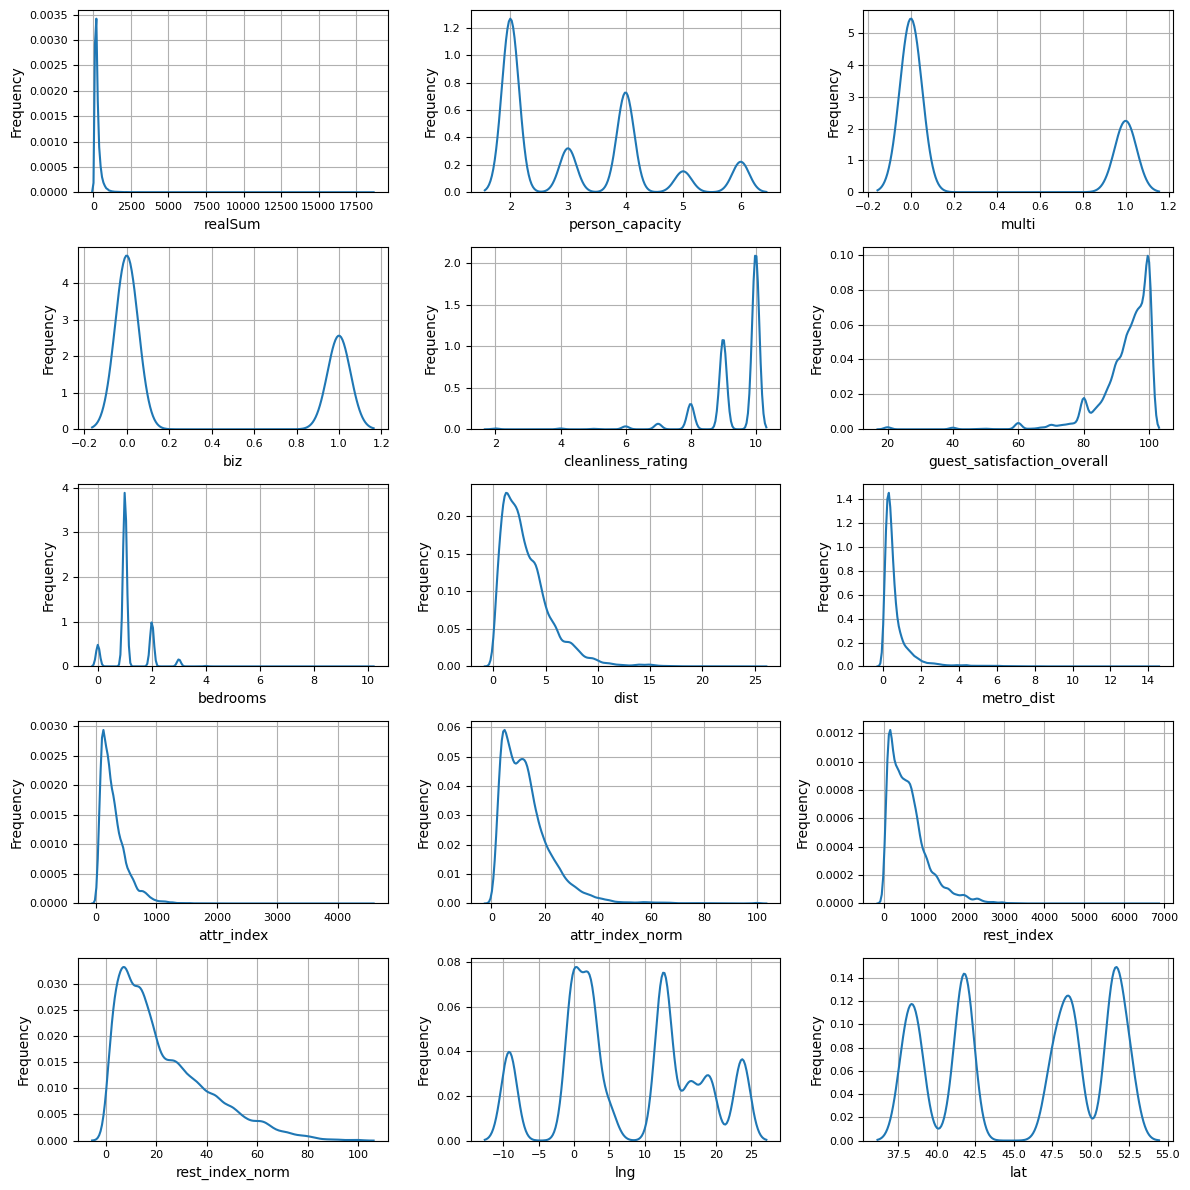

In [ ]:
features = numerical
rcParams['figure.figsize'] = 12, 12
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=europe[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()

plt.savefig('univariate.png')

Dari gambar grafik di atas menunjukkan bahwa
*   Kolom realSum, dist, metro_dist, attr_index, attr_index_norm, rest_index, dan rest_index_norm menunjukkan right skewed untuk persebaran datanya.
*   Kolom multi dan biz terlihat adanya dua puncak karena merupakan data yang terdiri dari dua pilihan, yaitu angka 1 (yes) dan angka 0 (no).
*   Kolom person_capacity, bedrooms, dan cleanliness_rating memiliki beberapa puncak. Hal ini dikarenakan pada kolom bedrooms, person_capacity, dan cleanliness_rating memiliki rentang nilai dari 0 sampai dengan 10. Sedangkan pada kolom guest_satisfaction memiliki rentang nilai dari 20 sampai dengan 100.





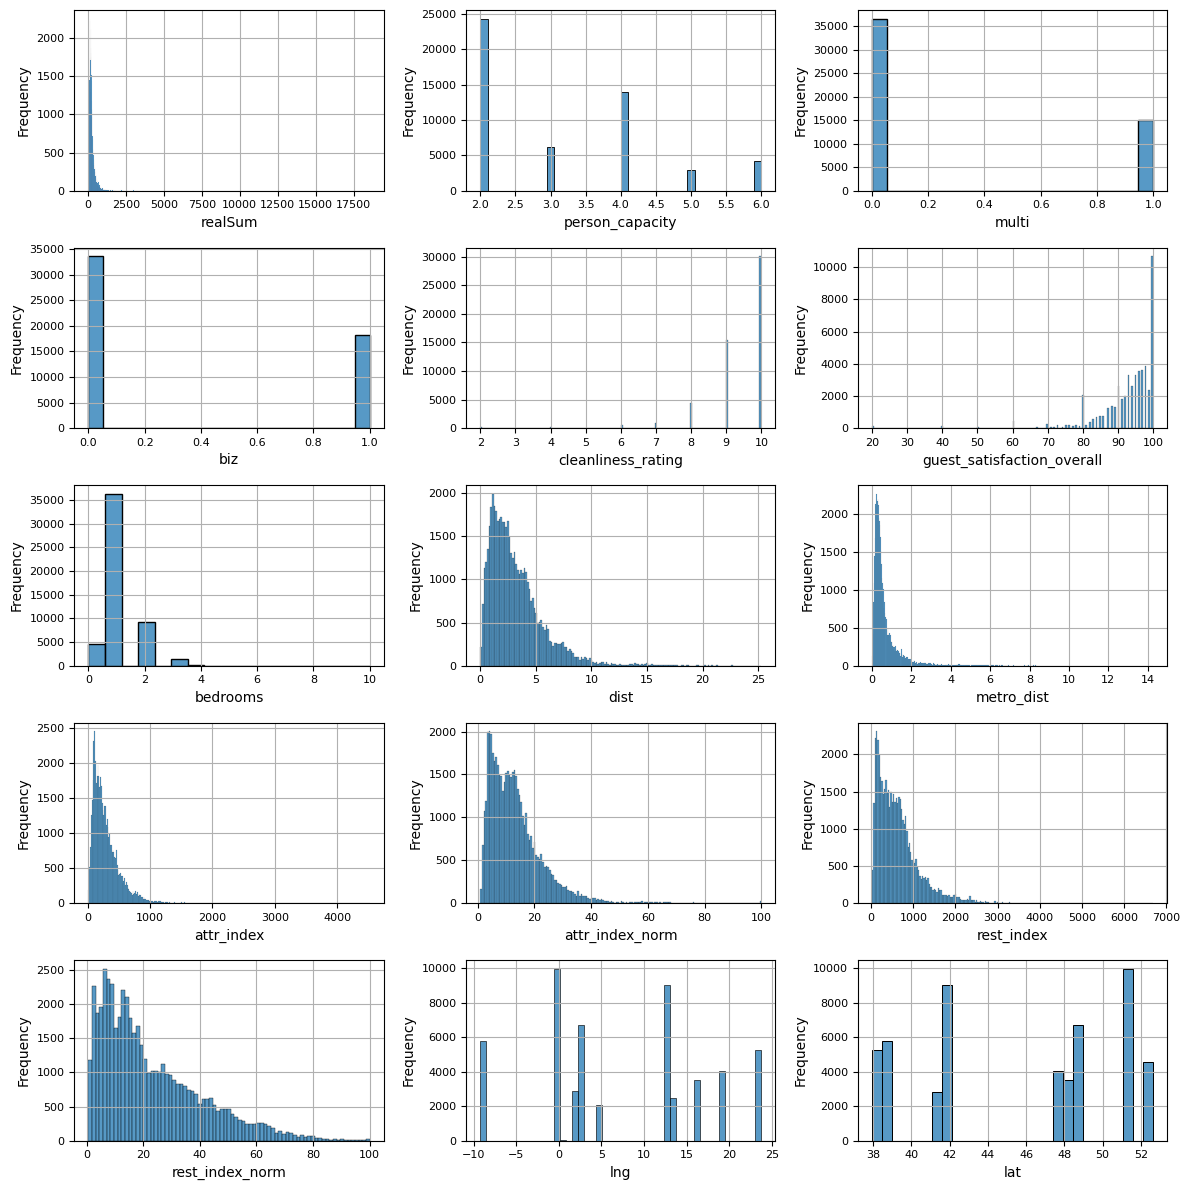

In [ ]:
features = numerical
rcParams['figure.figsize'] = 12, 12
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=europe[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()

plt.savefig('hist.png')

Dari gambar grafik di atas menunjukkan bahwa
*   Kolom multi dan biz terlihat dengan jelas bahwa hanya terdapat dua pilihan, yaitu angka 1 (yes) dan angka 0 (no).
*   Kolom person_capacity, bedrooms, dan cleanliness_rating terlihat dengan jelas bahwa pada kolom bedrooms dan person_capacity memiliki rentang nilai mulai dari 0,1, 2, 3, sampai 10. Sedangkan pada kolom guest_satisfaction memiliki rentang nilai dari 68, 70, 71, 72 sampai dengan 100.
*   kolom lat dan lng juga terlihat jelas bahwa terdapat beberapa lokasi yang memiliki titik lokasi yang sama.



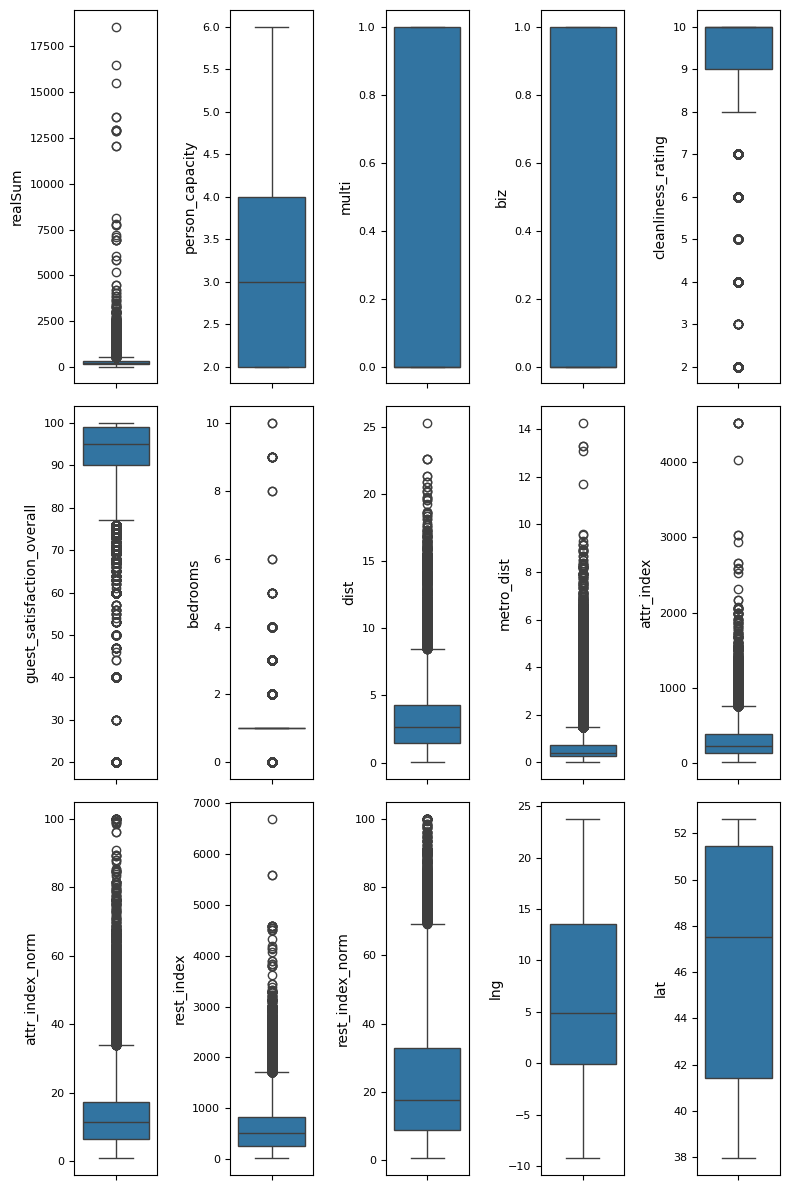

In [ ]:
features = numerical
rcParams['figure.figsize'] = 8, 12
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=europe[features[i]])
    plt.ylabel(features[i])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()
plt.savefig('box.png')

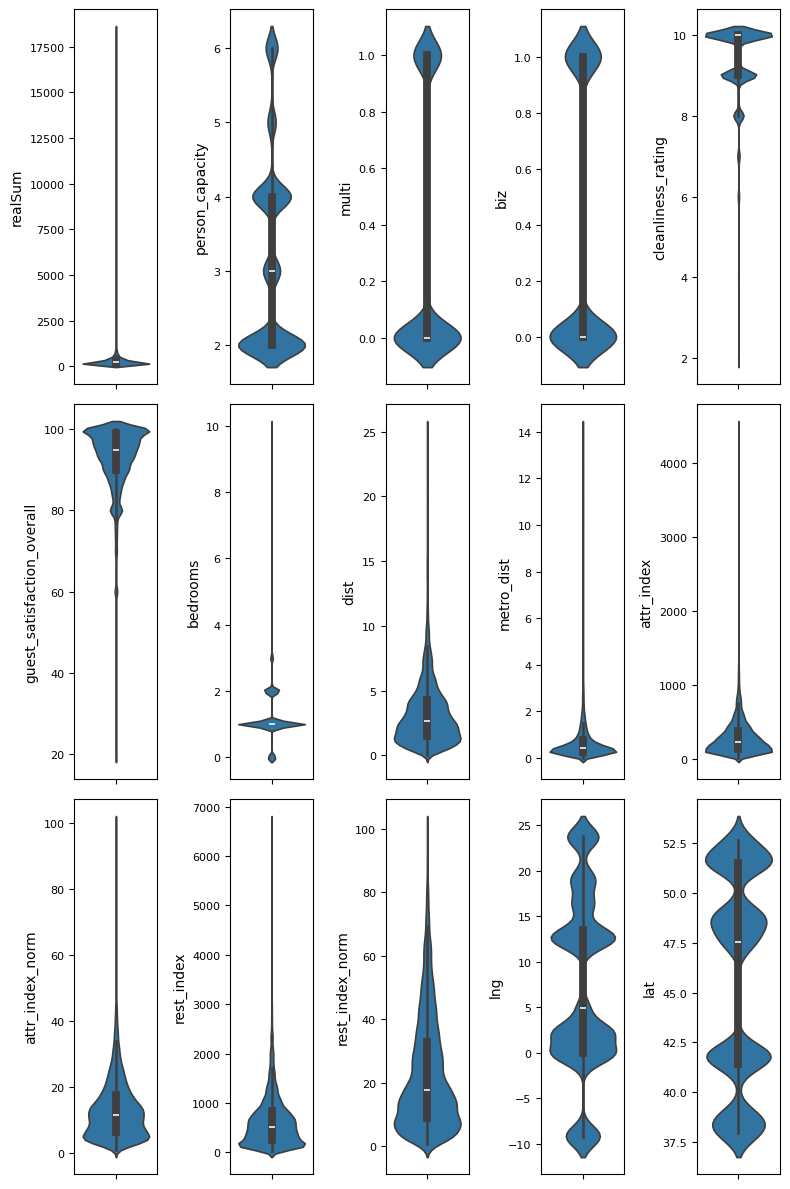

In [ ]:
features = numerical
rcParams['figure.figsize'] = 8, 12
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=europe[features[i]])
    plt.ylabel(features[i])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()

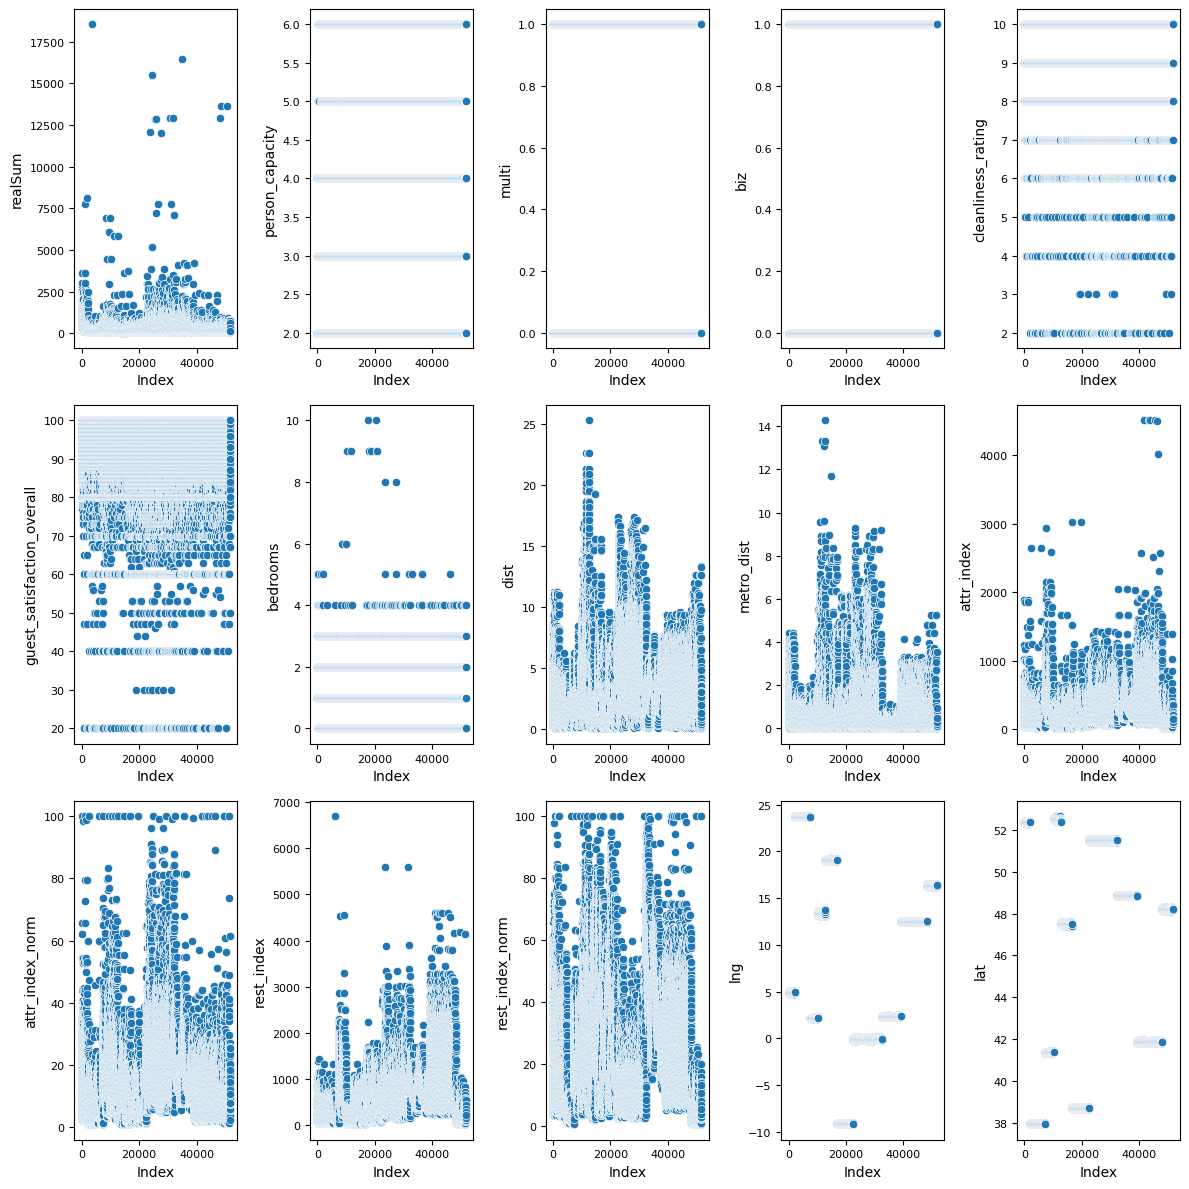

In [ ]:
# Set ukuran figure
rcParams['figure.figsize'] = 12, 12

# Membuat scatter plot untuk setiap fitur
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)  # 3 baris, 5 kolom
    sns.scatterplot(x=range(len(europe)), y=europe[features[i]])
    plt.xlabel('Index')
    plt.ylabel(features[i])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()

# Simpan scatter plot ke file
plt.savefig('scatter.png')

Dari gambar grafik boxplot dan violinplot di atas dapat disimpulkan bahwa terdapat outlier pada kolom realSum, clealiness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, dan rest_index-norm. Sedangkan dari gambar scatter plot terlihat bahwa untuk kolom cleanliness-rating, guest_satisfaction_overall, dan bedrooms tidak terdapat outlier.


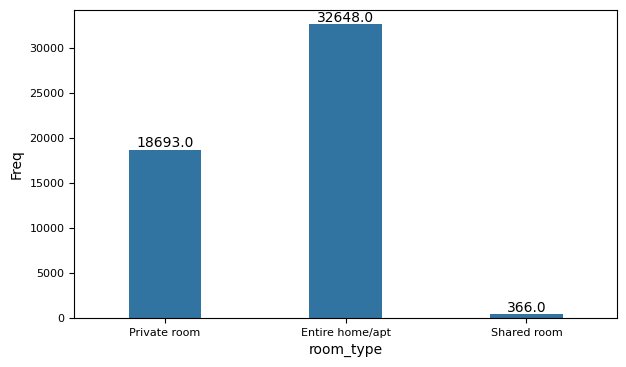

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='room_type', data= europe, width = 0.4)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

Pada kolom room_type, jumlah entire_home/apt lebih banyak dibandingkan private room dan shared room. Akan tetapi, jumlah shared_room tidak lebih dari 500 (sangat sedikit sekali).

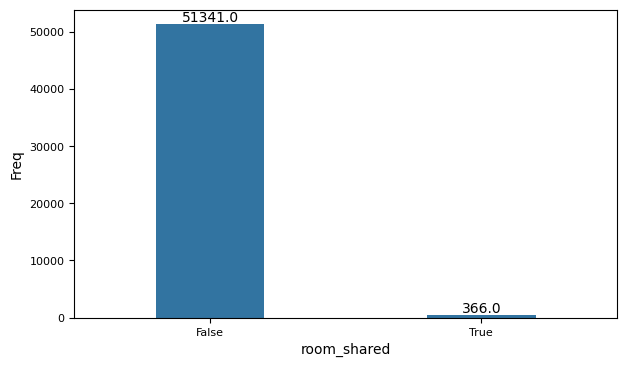

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='room_shared', data= europe, width = 0.4)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

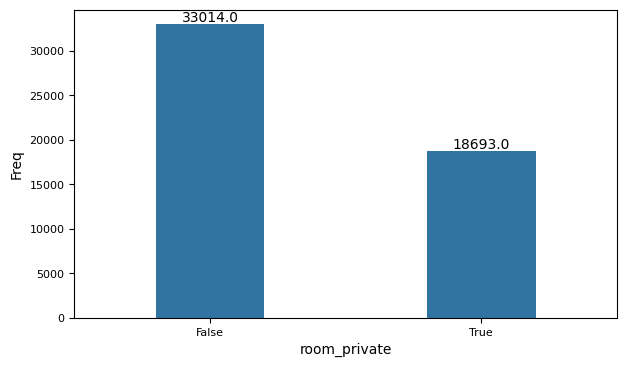

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='room_private', data= europe, width = 0.4)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

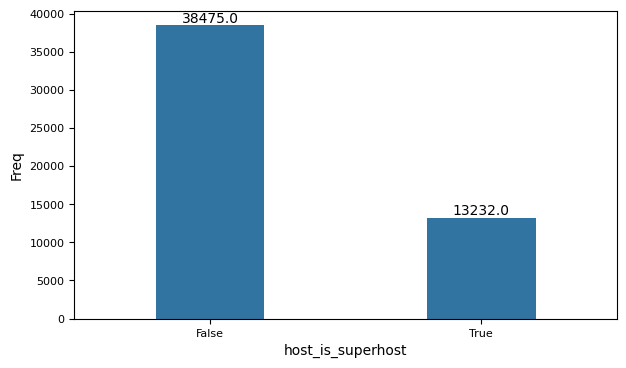

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='host_is_superhost', data= europe, width = 0.4)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

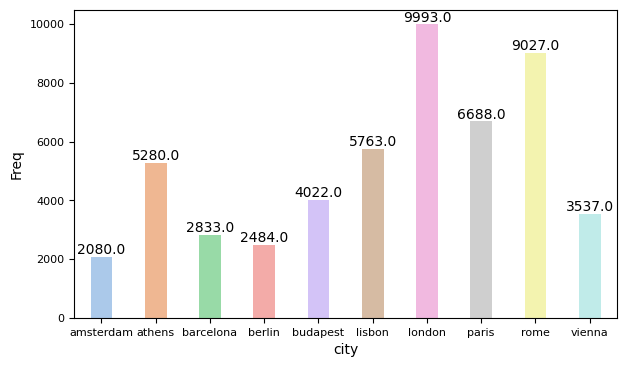

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='city', data= europe, hue = 'city', width = 0.4, palette = 'pastel', legend=False)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

### **3. Multivariate Analysis**

### **Feature and Target Relation**

In [ ]:
#Korelasi antar feature atau kolom
europe[numerical].corr()

realSum  person_capacity     multi       biz  \
realSum                     1.000000         0.203077 -0.052926  0.037144   
person_capacity             0.203077         1.000000 -0.054326  0.110668   
multi                      -0.052926        -0.054326  1.000000 -0.470725   
biz                         0.037144         0.110668 -0.470725  1.000000   
cleanliness_rating         -0.006082         0.003256  0.041064 -0.107310   
guest_satisfaction_overall -0.001888         0.005181  0.054254 -0.208160   
bedrooms                    0.221653         0.560627 -0.000659 -0.026741   
dist                       -0.044725        -0.128488  0.033426 -0.164767   
metro_dist                 -0.061025        -0.037267  0.043365 -0.109153   
attr_index                  0.178228         0.028394  0.006319  0.114732   
attr_index_norm             0.292396        -0.050487 -0.041412  0.093720   
rest_index                  0.134722         0.037330  0.007051  0.137747   
rest_index_norm             0.144094         0.038059 -0.037402  0.083999   
lng                        -0.173833         0.146848  0.041260 -0.088943   
lat                         0.211805        -0.168265 -0.034058 -0.126433   

                            cleanliness_rating  guest_satisfaction_overall  \
realSum                              -0.006082                   -0.001888   
person_capacity                       0.003256                    0.005181   
multi                                 0.041064                    0.054254   
biz                                  -0.107310                   -0.208160   
cleanliness_rating                    1.000000                    0.714045   
guest_satisfaction_overall            0.714045                    1.000000   
bedrooms                              0.033489                    0.047573   
dist                                 -0.030202                   -0.004178   
metro_dist                            0.010441                    0.029788   
attr_index                           -0.025322                   -0.050624   
attr_index_norm                      -0.075372                   -0.074146   
rest_index                           -0.031929                   -0.069319   
rest_index_norm                      -0.005995                   -0.008765   
lng                                   0.120379                    0.156079   
lat                                  -0.092502                   -0.033957   

                            bedrooms      dist  metro_dist  attr_index  \
realSum                     0.221653 -0.044725   -0.061025    0.178228   
person_capacity             0.560627 -0.128488   -0.037267    0.028394   
multi                      -0.000659  0.033426    0.043365    0.006319   
biz                        -0.026741 -0.164767   -0.109153    0.114732   
cleanliness_rating          0.033489 -0.030202    0.010441   -0.025322   
guest_satisfaction_overall  0.047573 -0.004178    0.029788   -0.050624   
bedrooms                    1.000000 -0.006262    0.044431   -0.011735   
dist                       -0.006262  1.000000    0.558064   -0.363088   
metro_dist                  0.044431  0.558064    1.000000   -0.168010   
attr_index                 -0.011735 -0.363088   -0.168010    1.000000   
attr_index_norm            -0.063773 -0.242862   -0.219587    0.714847   
rest_index                 -0.014047 -0.346653   -0.138876    0.850229   
rest_index_norm            -0.057726 -0.467791   -0.259654    0.544403   
lng                         0.013688 -0.147424   -0.069506   -0.126942   
lat                        -0.104694  0.405878    0.086424   -0.052438   

                            attr_index_norm  rest_index  rest_index_norm  \
realSum                            0.292396    0.134722         0.144094   
person_capacity                   -0.050487    0.037330         0.038059   
multi                             -0.041412    0.007051        -0.037402   
biz                                0.093720    0.137747   

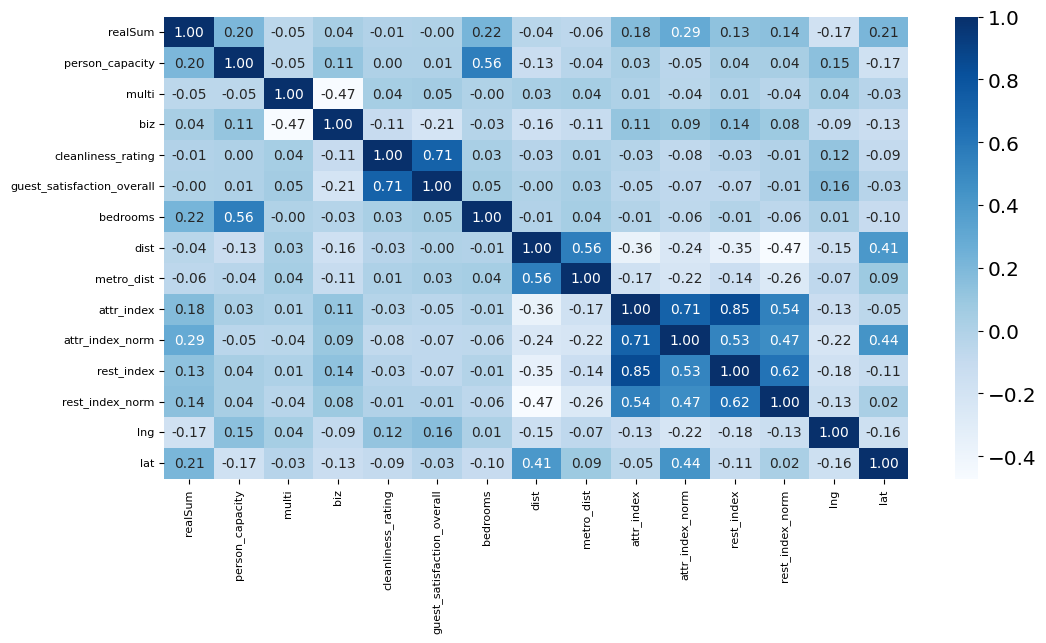

In [ ]:
rcParams['figure.figsize'] = 12, 6
sns.heatmap(europe[numerical].corr(),cmap='Blues', annot=True, fmt = '.2f')
plt.tick_params(axis='both', which='major', labelsize=8)

Dari heatmap di atas menunjukkan bahwa terdapat beberapa feature yang memiliki korelasi sangat kuat sehingg aperlu dilakukan analisis untuk memastikan apakah data-data tersebut redundant atau tidak. Selain itu, juga terdapat korelasi yang sangat lemah antar feature.

### **Antar Feature**

In [ ]:
room_type_values = europe[['room_type', 'city']].value_counts().reset_index()
person_capacity = europe[['person_capacity', 'city']].value_counts().reset_index()

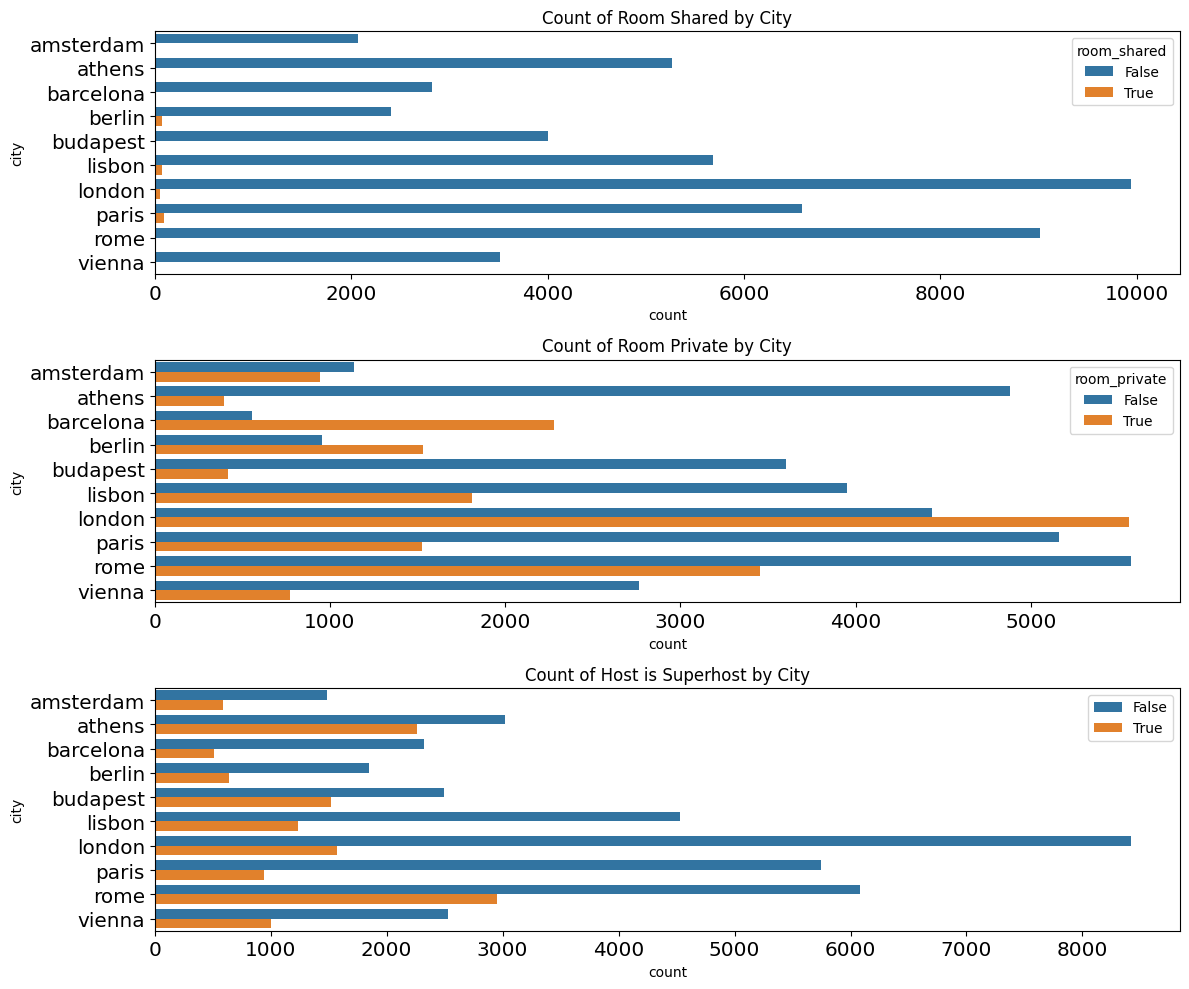

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
sns.countplot(y='city', data=europe, hue='room_shared', ax=ax[0])
ax[0].set_title('Count of Room Shared by City')
sns.countplot(y='city', data=europe, hue='room_private', ax=ax[1])
ax[1].set_title('Count of Room Private by City')
sns.countplot(y='city', data=europe, hue='host_is_superhost', ax=ax[2])
ax[2].set_title('Count of Host is Superhost by City')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [ ]:
meanprices=europe.groupby(['city','week_time']).realSum.mean().reset_index().sort_values(by=['realSum'])
meanprices=meanprices.rename(columns={'realSum':'mean_price'})

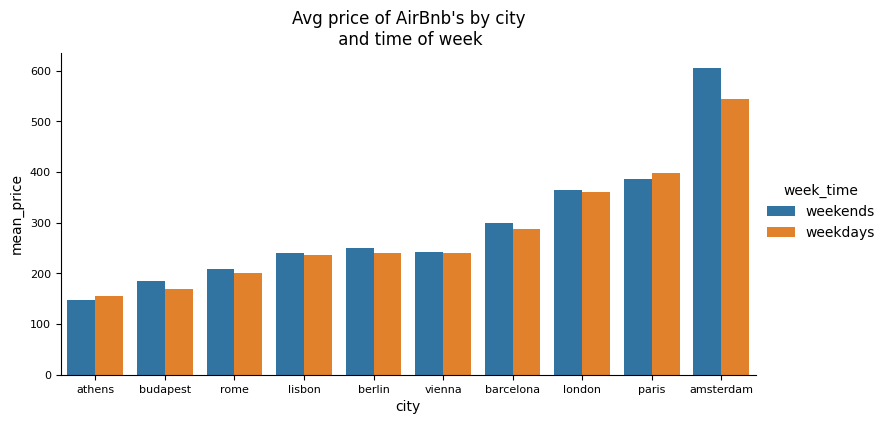

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='city',y='mean_price',hue='week_time',data=meanprices,
           height=4, aspect=2,kind='bar')
plt.title('Avg price of AirBnb\'s by city\n and time of week')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

In [ ]:
number_of_room=europe.groupby(['room_type','person_capacity']).realSum.count().reset_index().sort_values(by=['realSum'])
number_of_room=number_of_room.rename(columns={'realSum':'number_of_room'})

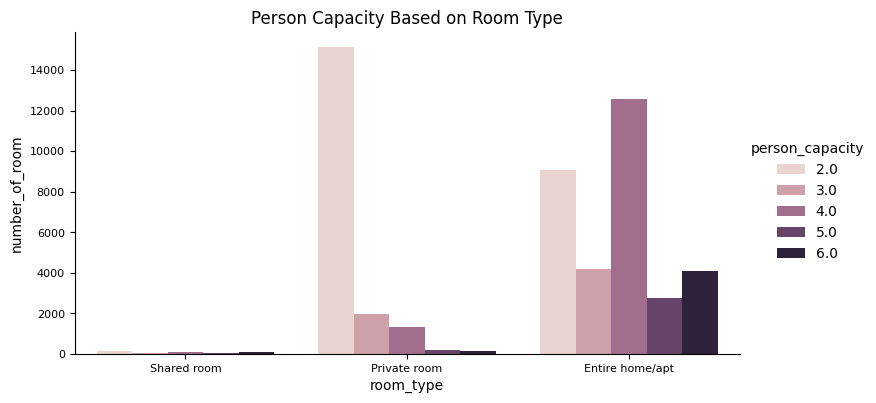

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='room_type',y='number_of_room',hue='person_capacity',data=number_of_room,
           height=4, aspect=2,kind='bar')
plt.title('Person Capacity Based on Room Type')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

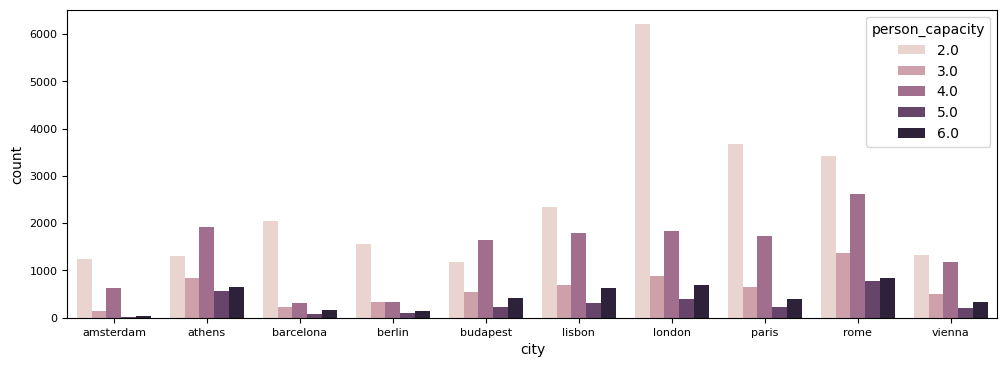

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(x='city',data=europe, hue='person_capacity')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [ ]:
avg_by_room=europe.groupby(['room_type']).realSum.mean().reset_index().sort_values(by=['realSum'])
avg_by_room=avg_by_room.rename(columns={'realSum':'avg_by_room'})

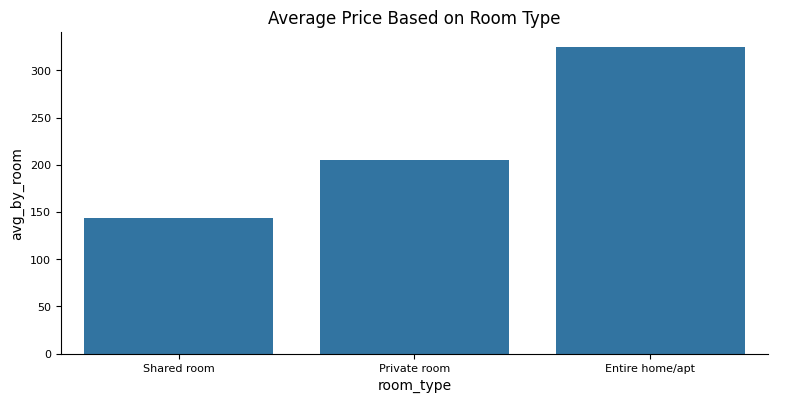

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='room_type',y='avg_by_room',data=avg_by_room,
           height=4, aspect=2,kind='bar')
plt.title('Average Price Based on Room Type')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

## **E. Data Pre Processing**

### **1. Data Type Conversion**

In [ ]:
europe_airbnb=europe.copy()

In [ ]:
europe_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

In [ ]:
europe_airbnb['person_capacity'] = europe_airbnb['person_capacity'].astype(int)
europe_airbnb['cleanliness_rating'] = europe_airbnb['cleanliness_rating'].astype(int)
europe_airbnb['guest_satisfaction_overall'] = europe_airbnb['guest_satisfaction_overall'].astype(int)
europe_airbnb['room_shared'] = europe_airbnb['room_shared'].astype(str)
europe_airbnb['room_private'] = europe_airbnb['room_private'].astype(str)
europe_airbnb['host_is_superhost'] = europe_airbnb['host_is_superhost'].astype(str)

In [ ]:
europe_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  object 
 3   room_private                51707 non-null  object 
 4   person_capacity             51707 non-null  int64  
 5   host_is_superhost           51707 non-null  object 
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  int64  
 9   guest_satisfaction_overall  51707 non-null  int64  
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

In [ ]:
europe_airbnb.sample(10)

realSum        room_type room_shared room_private  person_capacity  \
19957  286.819887  Entire home/apt       False        False                6   
35955  231.382235  Entire home/apt       False        False                2   
20231  220.919325  Entire home/apt       False        False                5   
36754  287.305434  Entire home/apt       False        False                2   
6033   211.609214  Entire home/apt       False        False                6   
999    702.786305  Entire home/apt       False        False                2   
9587   636.535015     Private room       False         True                4   
34559  231.615248  Entire home/apt       False        False                2   
42857  161.550511     Private room       False         True                2   
385    373.772643     Private room       False         True                2   

      host_is_superhost  multi  biz  cleanliness_rating  \
19957              True      0    1                  10   
35955             False      0    0                  10   
20231             False      1    0                   8   
36754             False      1    0                   9   
6033              False      0    0                  10   
999               False      0    1                  10   
9587              False      0    1                   7   
34559             False      0    0                  10   
42857              True      1    0                  10   
385                True      1    0                  10   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
19957                          96  ...  4.775439    3.836526  104.320412   
35955                          89  ...  1.793019    0.198311  385.331268   
20231                          76  ...  2.088610    0.736859  122.940110   
36754                          84  ...  4.312568    0.429530  480.824102   
6033                           98  ...  0.487133    0.513421  158.545969   
999                            94  ...  0.416242    0.446043  598.896509   
9587                           60  ...  1.130816    0.171485  620.570383   
34559                          98  ...  2.311423    0.199778  259.898062   
42857                          96  ...  3.016718    1.487897  545.440480   
385                            98  ...  0.902817    1.053211  431.786454   

       attr_index_norm   rest_index  rest_index_norm       lng       lat  \
19957         3.440828   155.419346         8.734978  -9.19253  38.70080   
35955        18.736761  1073.206256        49.509507   2.35341  48.87269   
20231         4.054967   337.089031        18.945295  -9.16306  38.71653   
36754        23.380107   809.414233        37.340166   2.29657  48.86802   
6033          5.973654   241.750326         3.610285  23.74000  37.97800   
999          31.711968   688.976997        48.008908   4.88700  52.37300   
9587         23.960940  1241.385947        27.269078   2.17371  41.37734   
34559        12.651750   686.422366        40.333860   2.37940  48.86766   
42857        12.087069  1801.829179        39.230894  12.47100  41.88700   
385          22.863380   598.425549        41.699153   4.88281  52.37835   

       week_time       city  
19957   weekends     lisbon  
35955   weekends      paris  
20231   weekends     lisbon  
36754   weekends      paris  
6033    weekends     athens  
999     weekdays  amsterdam  
9587    weekends  barcelona  
34559   weekdays      paris  
42857   weekdays       rome  
385     weekdays  amsterdam  

[10 rows x 21 columns]

In [ ]:
europe_airbnb = europe_airbnb.rename(columns = {'realSum' : 'price'})

### **2. Handle Missing Value**

In [ ]:
europe_airbnb.isna().sum()

price                         0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
week_time                     0
city                          0
dtype: int64

Tidak ada missing value, sehingga tidak perlu dilakukan pengolahan terhadap missing value

### **3. Handling Duplicate Value**

In [ ]:
duplicated = europe_airbnb[europe_airbnb.duplicated(keep=False)]
print(duplicated)

Empty DataFrame
Columns: [price, room_type, room_shared, room_private, person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat, week_time, city]
Index: []

[0 rows x 21 columns]


Tidak ada duplicate value, sehingga tidak perlu dilakukan pengolahan terhadap duplicate value

### **4. Feature Encoding**

In [ ]:
# Label Encoding
# Label Encoding pada room_shared, room_private, host_is_superhost
mapping_bool = {
    'True' : 1,
    'False' : 0,
}
europe_airbnb['room_shared'] = europe_airbnb['room_shared'].map(mapping_bool)
europe_airbnb['room_private'] = europe_airbnb['room_private'].map(mapping_bool)
europe_airbnb['host_is_superhost'] = europe_airbnb['host_is_superhost'].map(mapping_bool)
# Label Encoding pada weektime
mapping_week = {
    'weekends' : 1,
    'weekdays' : 0,
}
europe_airbnb['week_time'] = europe_airbnb['week_time'].map(mapping_week)

In [ ]:
# One Hot Encoding pada Feature City dan room_type
city_ohe = pd.get_dummies(europe_airbnb['city'], prefix='kota').astype(int)
type_ohe = pd.get_dummies(europe_airbnb['room_type']).astype(int)

In [ ]:
europe_airbnb = pd.concat([europe_airbnb, city_ohe, type_ohe], axis=1)

In [ ]:
europe_airbnb = europe_airbnb.drop('room_type', axis=1)

In [ ]:
europe_airbnb.head()

price  room_shared  room_private  person_capacity  host_is_superhost  \
0  194.033698            0             1                2                  0   
1  344.245776            0             1                4                  0   
2  264.101422            0             1                2                  0   
3  433.529398            0             1                4                  0   
4  485.552926            0             1                2                  1   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  ...  \
0      1    0                  10                          93         1  ...   
1      0    0                   8                          85         1  ...   
2      0    1                   9                          87         1  ...   
3      0    1                   9                          90         2  ...   
4      0    0                  10                          98         1  ...   

   kota_berlin  kota_budapest  kota_lisbon  kota_london  kota_paris  \
0            0              0            0            0           0   
1            0              0            0            0           0   
2            0              0            0            0           0   
3            0              0            0            0           0   
4            0              0            0            0           0   

   kota_rome  kota_vienna  Entire home/apt  Private room Shared room  
0          0            0                0             1           0  
1          0            0                0             1           0  
2          0            0                0             1           0  
3          0            0                0             1           0  
4          0            0                0             1           0  

[5 rows x 33 columns]

### **5. Feature Extraction**

In [ ]:
#1. harga per kapasitas pengunjung
europe_airbnb['price_per_person'] = europe_airbnb['price'] / europe_airbnb['person_capacity']

#2. indikator aksesibilitas airbnb menuju pusat kota
def categorize_distance(dist):
    if dist < 5:
        return 'Central'
    elif dist <= 15:
        return 'Suburban'
    else:
        return 'Remote'

europe_airbnb['accessibility'] = europe_airbnb['dist'].apply(categorize_distance)

#3. kategori popularitas airbnb (high, medium, low) berdasarkan kepuasan pelanggan
def satisfaction_category(score):
    if score > 9:
        return 'High'
    elif score >= 7:
        return 'Medium'
    else:
        return 'Low'

europe_airbnb['satisfaction_level'] = europe_airbnb['guest_satisfaction_overall'].apply(satisfaction_category)
print(europe_airbnb.head())

        price  room_shared  room_private  person_capacity  host_is_superhost  \
0  194.033698            0             1                2                  0   
1  344.245776            0             1                4                  0   
2  264.101422            0             1                2                  0   
3  433.529398            0             1                4                  0   
4  485.552926            0             1                2                  1   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  ...  \
0      1    0                  10                          93         1  ...   
1      0    0                   8                          85         1  ...   
2      0    1                   9                          87         1  ...   
3      0    1                   9                          90         2  ...   
4      0    0                  10                          98         1  ...   

   kota_london  kota_paris  kota_rome 

In [ ]:
europe_airbnb['accessibility'] = europe_airbnb['accessibility'].astype(str)
europe_airbnb['satisfaction_level'] = europe_airbnb['satisfaction_level'].astype(str)

In [ ]:
# Label Encoding pada accesbility
mapping_week = {
    'Central': 3,
    'Suburban': 2,
    'Remote': 1
}
europe_airbnb['accessibility'] = europe_airbnb['accessibility'].map(mapping_week)
# Label Encoding pada satisfaction_level
mapping_week = {
    'High': 3,
    'Medium': 2,
    'Low': 1
}
europe_airbnb['satisfaction_level'] = europe_airbnb['satisfaction_level'].map(mapping_week)

print(europe_airbnb.head())

        price  room_shared  room_private  person_capacity  host_is_superhost  \
0  194.033698            0             1                2                  0   
1  344.245776            0             1                4                  0   
2  264.101422            0             1                2                  0   
3  433.529398            0             1                4                  0   
4  485.552926            0             1                2                  1   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  ...  \
0      1    0                  10                          93         1  ...   
1      0    0                   8                          85         1  ...   
2      0    1                   9                          87         1  ...   
3      0    1                   9                          90         2  ...   
4      0    0                  10                          98         1  ...   

   kota_london  kota_paris  kota_rome 

In [ ]:
europe_airbnb['accessibility'] = europe_airbnb['accessibility'].astype(int)
europe_airbnb['satisfaction_level'] = europe_airbnb['satisfaction_level'].astype(int)

Kami memilih untuk membuat kolom tambahan di bawah ini dengan alasan sebagai berikut:
1. price_per_person: kolom baru guna menunjukkan berapa rata-rata harga per orang berdasarkan kapasitas orang (person_capacity)

2. accessibility : kolom baru yang digunakan untuk mengkategorikan lokasi airbnb menggunakan kolom dist dan metro_dist dengan klasifikasi:
"Central": Properti dekat pusat kota (jarak < 5 km).
"Suburban": Properti agak jauh dari pusat (5-15 km).
"Remote": Properti sangat jauh (> 15 km)

3. satisfaction_level : kolom baru yang digunakan untuk mengkategorikan properti berdasarkan tingkat kepuasan tamu, adapun indikator yang digunakan sebagai berikut: High: Skor > 9.
Medium: Skor 7-9.
Low: Skor < 7.

### **6. Handling Outliers**

In [ ]:
num = ['price','price_per_person','person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm','satisfaction_level','accessibility', 'bedrooms','lat','lng','multi','biz']
feature = num

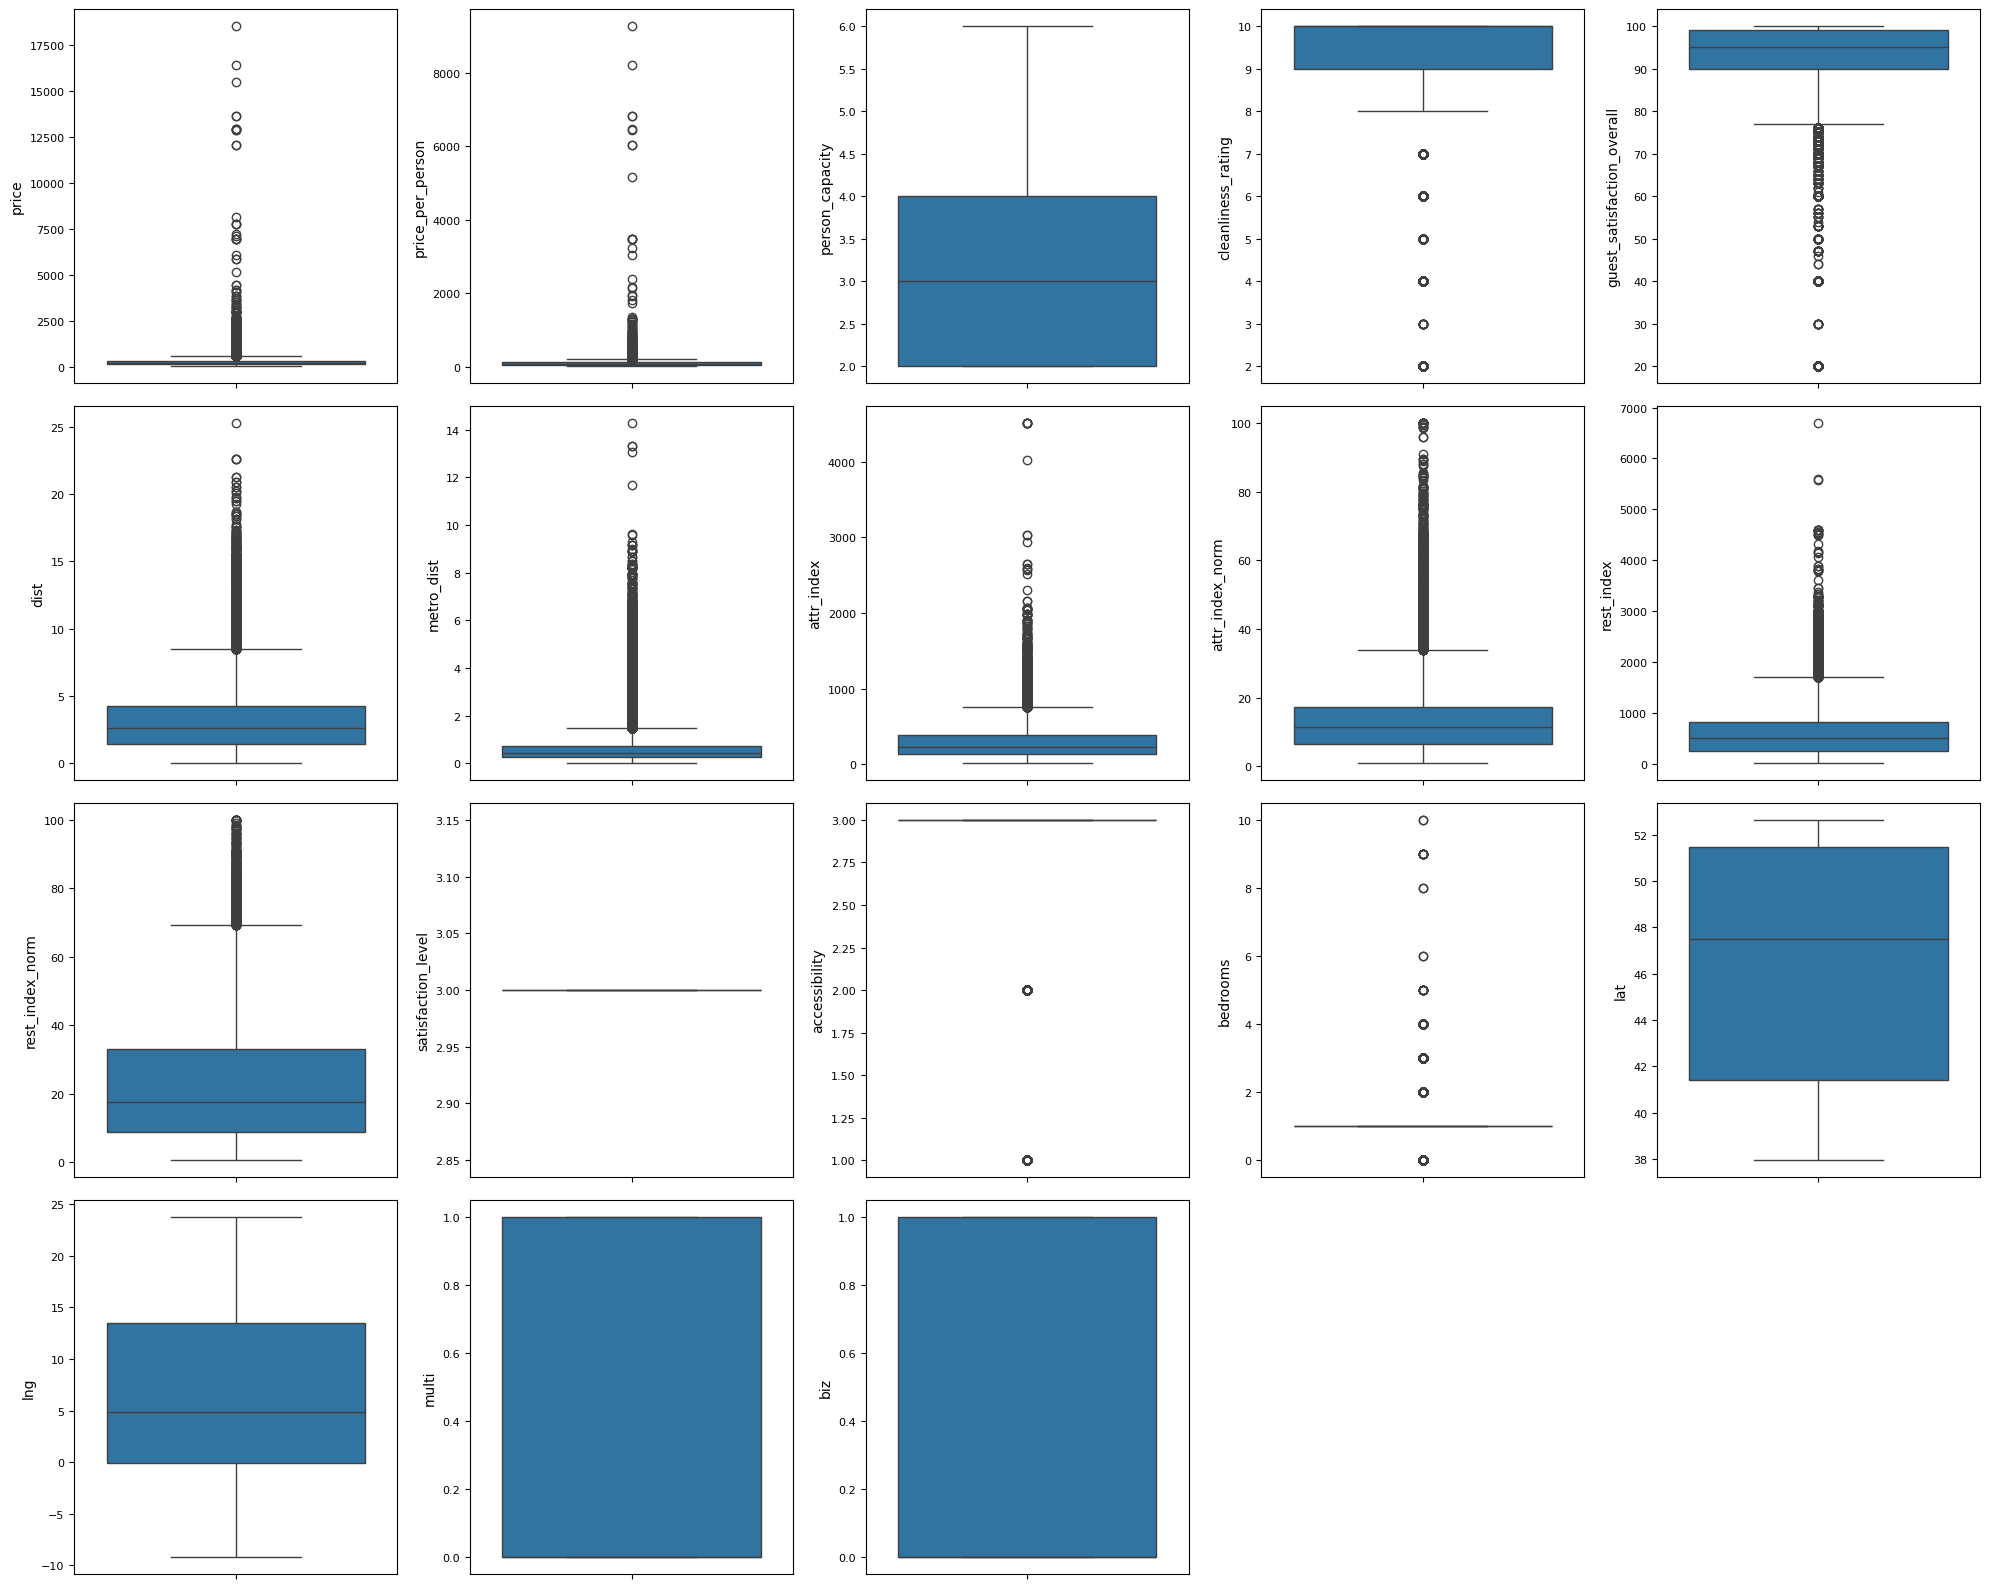

In [ ]:
# Menentukan jumlah fitur
num_features = len(feature)

# Menentukan jumlah kolom dan baris berdasarkan jumlah fitur
cols = 5  # Tetapkan jumlah kolom tetap 5
rows = (num_features // cols) + (num_features % cols > 0)  # Menyesuaikan jumlah baris

# Menyesuaikan ukuran figure
rcParams['figure.figsize'] = 8, 12
plt.figure(figsize=(cols * 4, rows * 4))

# Membuat boxplot untuk setiap fitur
for i in range(num_features):
    plt.subplot(rows, cols, i + 1)  # Menyesuaikan grid
    sns.boxplot(y=europe_airbnb[feature[i]])  # Menampilkan boxplot
    plt.ylabel(feature[i])
    plt.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()  # Mengatur layout agar tidak ada subplot yang saling bertumpukan
plt.savefig('box.png')  # Menyimpan gambar ke file

<ipython-input-61-7a9146caa875>:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=europe_airbnb[feature[i]])  # Menampilkan KDE plot


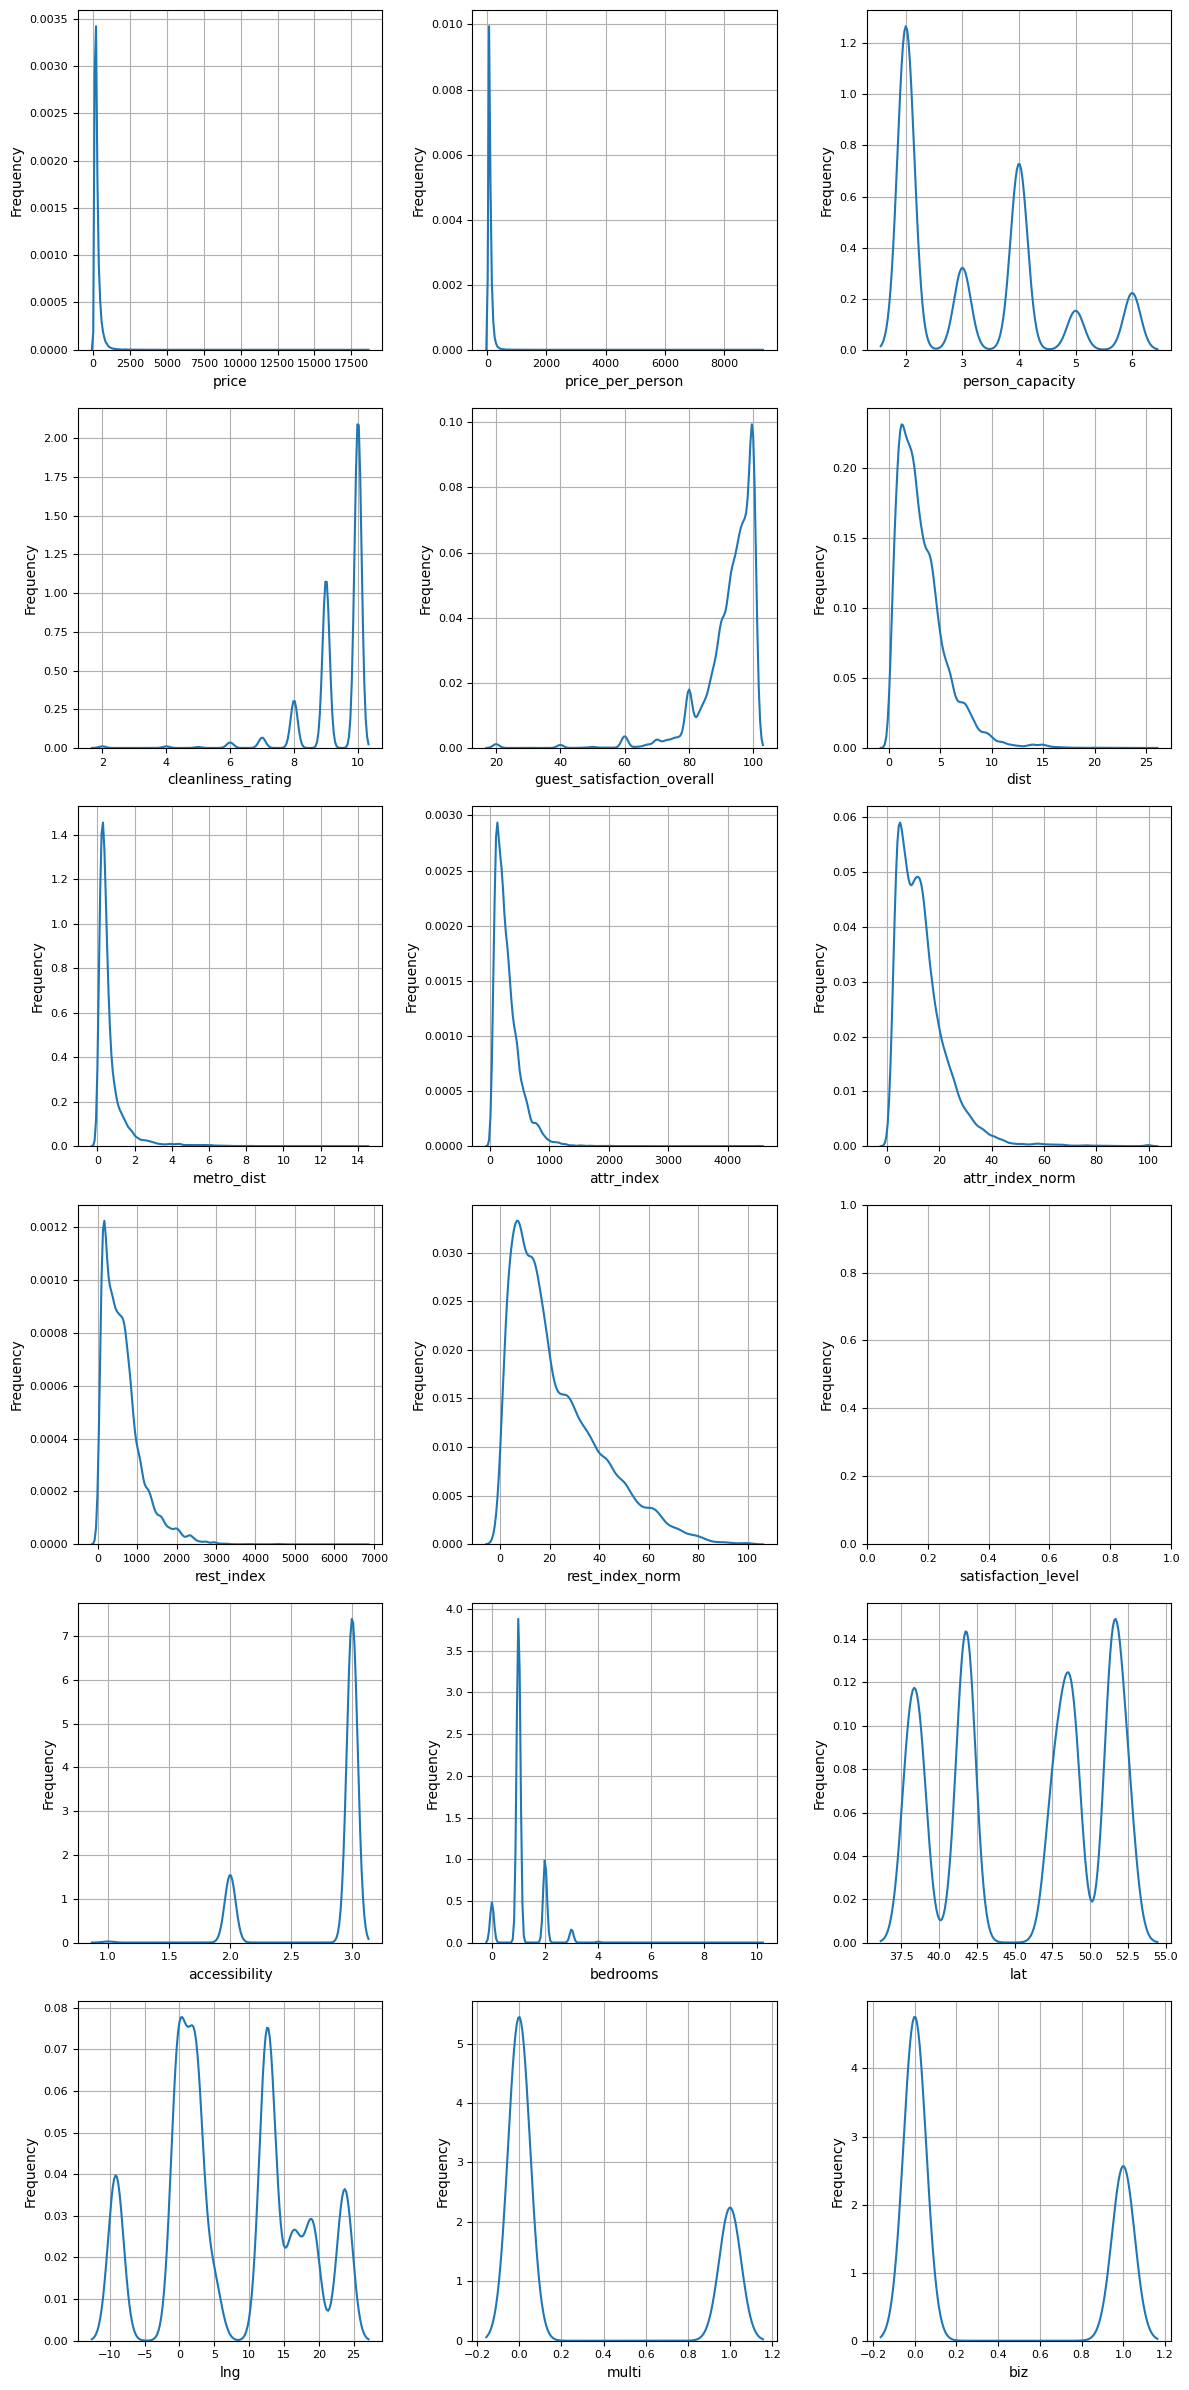

In [ ]:
# Menentukan jumlah fitur
num_features = len(feature)

# Menentukan jumlah kolom dan baris berdasarkan jumlah fitur
cols = 3  # Tetapkan jumlah kolom tetap 3
rows = (num_features // cols) + (num_features % cols > 0)  # Menyesuaikan jumlah baris

# Menyesuaikan ukuran figure
rcParams['figure.figsize'] = 12, 12
plt.figure(figsize=(cols * 4, rows * 4))

# Membuat KDE plot untuk setiap fitur
for i in range(num_features):
    plt.subplot(rows, cols, i + 1)  # Menyesuaikan grid
    sns.kdeplot(x=europe_airbnb[feature[i]])  # Menampilkan KDE plot
    plt.xlabel(feature[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()

# Menyusun layout secara rapi
plt.tight_layout()

# Menyimpan gambar ke file
plt.savefig('univariate.png')

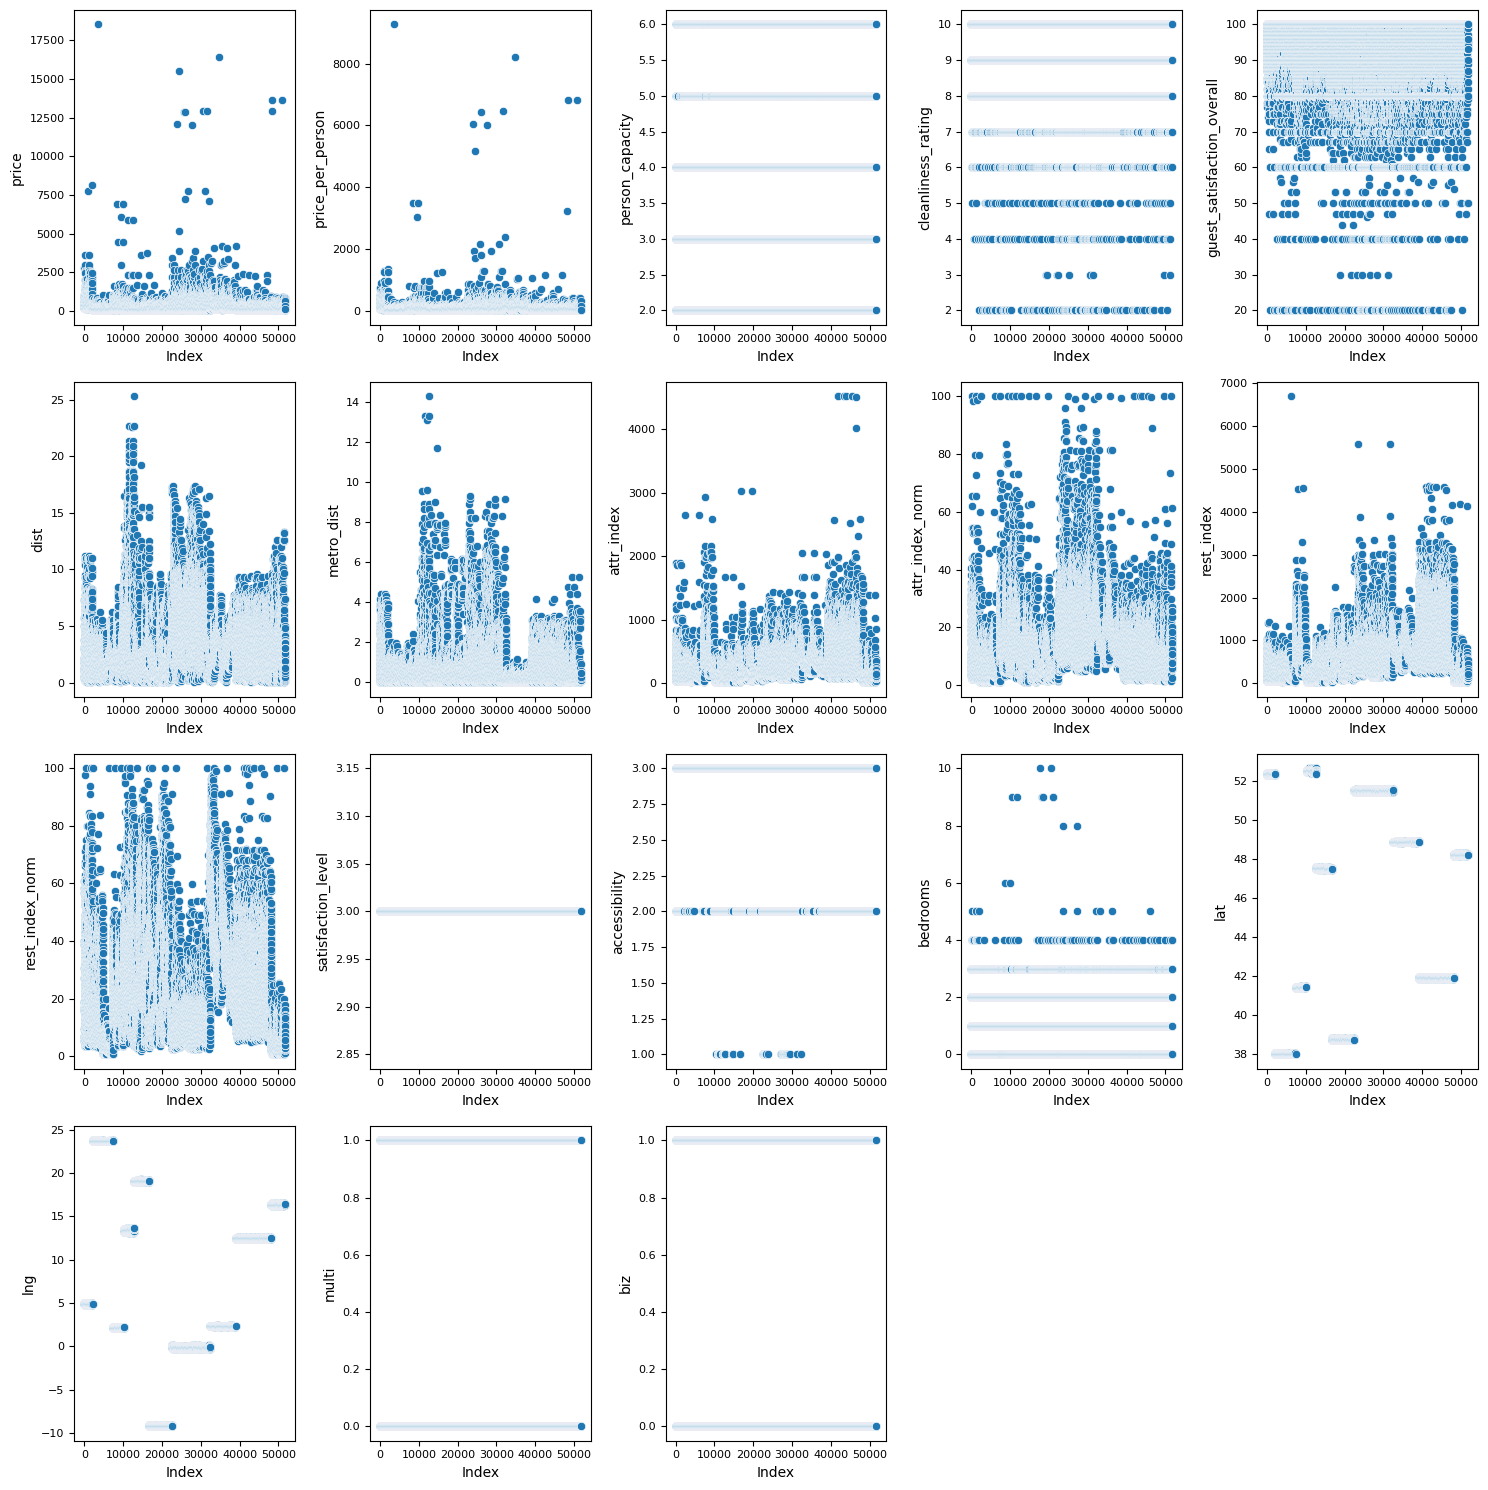

In [ ]:
feature = num

# Set ukuran figure
rcParams['figure.figsize'] = 15, 15

# Membuat scatter plot untuk setiap fitur
for i in range(0, len(feature)):
    plt.subplot(4, 5, i+1)  # Menggunakan 4 baris, 5 kolom untuk menampung 18 fitur
    sns.scatterplot(x=range(len(europe_airbnb)), y=europe_airbnb[feature[i]])
    plt.xlabel('Index')
    plt.ylabel(feature[i])
    plt.tick_params(axis='both', which='major', labelsize=8)

# Tata letak dan simpan
plt.tight_layout()
plt.savefig('scatter.png')

In [ ]:
for column in europe_airbnb.columns:
    print(f"Kolom: {column}")
    print(europe_airbnb[column].unique())
    print("-" * 50)

Kolom: price
[194.03369812 344.24577602 264.10142245 ... 715.93857373 637.16896898
 301.05415702]
--------------------------------------------------
Kolom: room_shared
[0 1]
--------------------------------------------------
Kolom: room_private
[1 0]
--------------------------------------------------
Kolom: person_capacity
[2 4 3 6 5]
--------------------------------------------------
Kolom: host_is_superhost
[0 1]
--------------------------------------------------
Kolom: multi
[1 0]
--------------------------------------------------
Kolom: biz
[0 1]
--------------------------------------------------
Kolom: cleanliness_rating
[10  8  9  6  7  5  4  2  3]
--------------------------------------------------
Kolom: guest_satisfaction_overall
[ 93  85  87  90  98 100  94  96  88  97  95  89  91  84  77  99  80  92
  82  78  86  74  81  83  73  76  75  70  65  47  60  20  40  72  79  68
  57  56  67  50  53  63  71  66  64  69  62  30  44  46  55  61  54]
------------------------------------

In [ ]:
europe_airbnb.drop(columns=['satisfaction_level'], inplace=True)

In [ ]:
europe_airbnb.drop(columns=['city'], inplace=True)

Kolom satisfaction dihapus karena kolom tersebut hanya memiliki 1 unique value sehingga tidak bisa digunakan untuk analisis selanjutnya.
Kolom city dihapus karena sudah dilakukan one hot encoding sehingga tidak menimbulkan adanya data yang redundant.

#### **Winsorization**

{'whiskers': [<matplotlib.lines.Line2D at 0x7af7b7dadae0>,
 'caps': [<matplotlib.lines.Line2D at 0x7af7b7dad9c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7af7b7dad000>],
 'medians': [<matplotlib.lines.Line2D at 0x7af7b7dafe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7af7b7dac0a0>],
 'means': []}

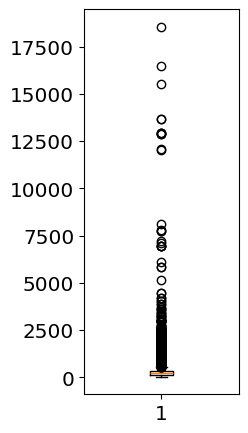

In [ ]:
rcParams['figure.figsize'] = 2, 5
plt.boxplot(europe_airbnb['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7af7b3b83730>,
 'caps': [<matplotlib.lines.Line2D at 0x7af7b3b816f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7af7b3b80f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7af7b7d5ae00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7af7b7d59750>],
 'means': []}

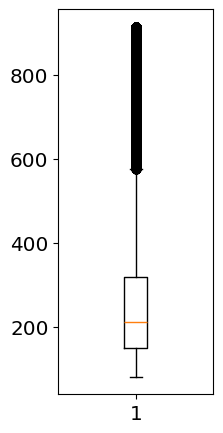

In [ ]:
from scipy.stats.mstats import winsorize
europe_airbnb['price'] = winsorize(europe_airbnb['price'], limits=[0.02, 0.02])
plt.boxplot(europe_airbnb['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7af7b4203c70>,
 'caps': [<matplotlib.lines.Line2D at 0x7af7b42035b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7af7b42011e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7af7b429c7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7af7b429ebc0>],
 'means': []}

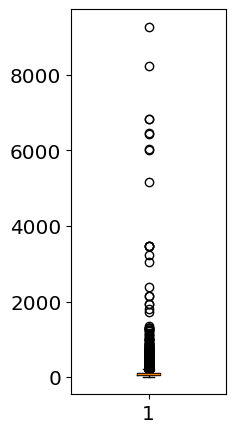

In [ ]:
rcParams['figure.figsize'] = 2, 5
plt.boxplot(europe_airbnb['price_per_person'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7af7b3670910>,
 'caps': [<matplotlib.lines.Line2D at 0x7af7b3673460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7af7b3670ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7af7b3673670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7af7b36703d0>],
 'means': []}

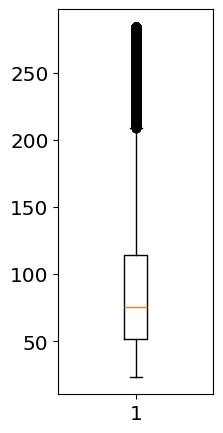

In [ ]:
from scipy.stats.mstats import winsorize
europe_airbnb['price_per_person'] = winsorize(europe_airbnb['price_per_person'], limits=[0.02, 0.02])
plt.boxplot(europe_airbnb['price_per_person'])

In [ ]:
from scipy.stats.mstats import winsorize

columns_to_winsorize = ['cleanliness_rating', 'guest_satisfaction_overall',
                        'dist', 'metro_dist', 'attr_index', 'attr_index_norm',
                        'rest_index', 'rest_index_norm']

for col in columns_to_winsorize:
    europe_airbnb[col] = winsorize(europe_airbnb[col], limits=[0.01, 0.01])

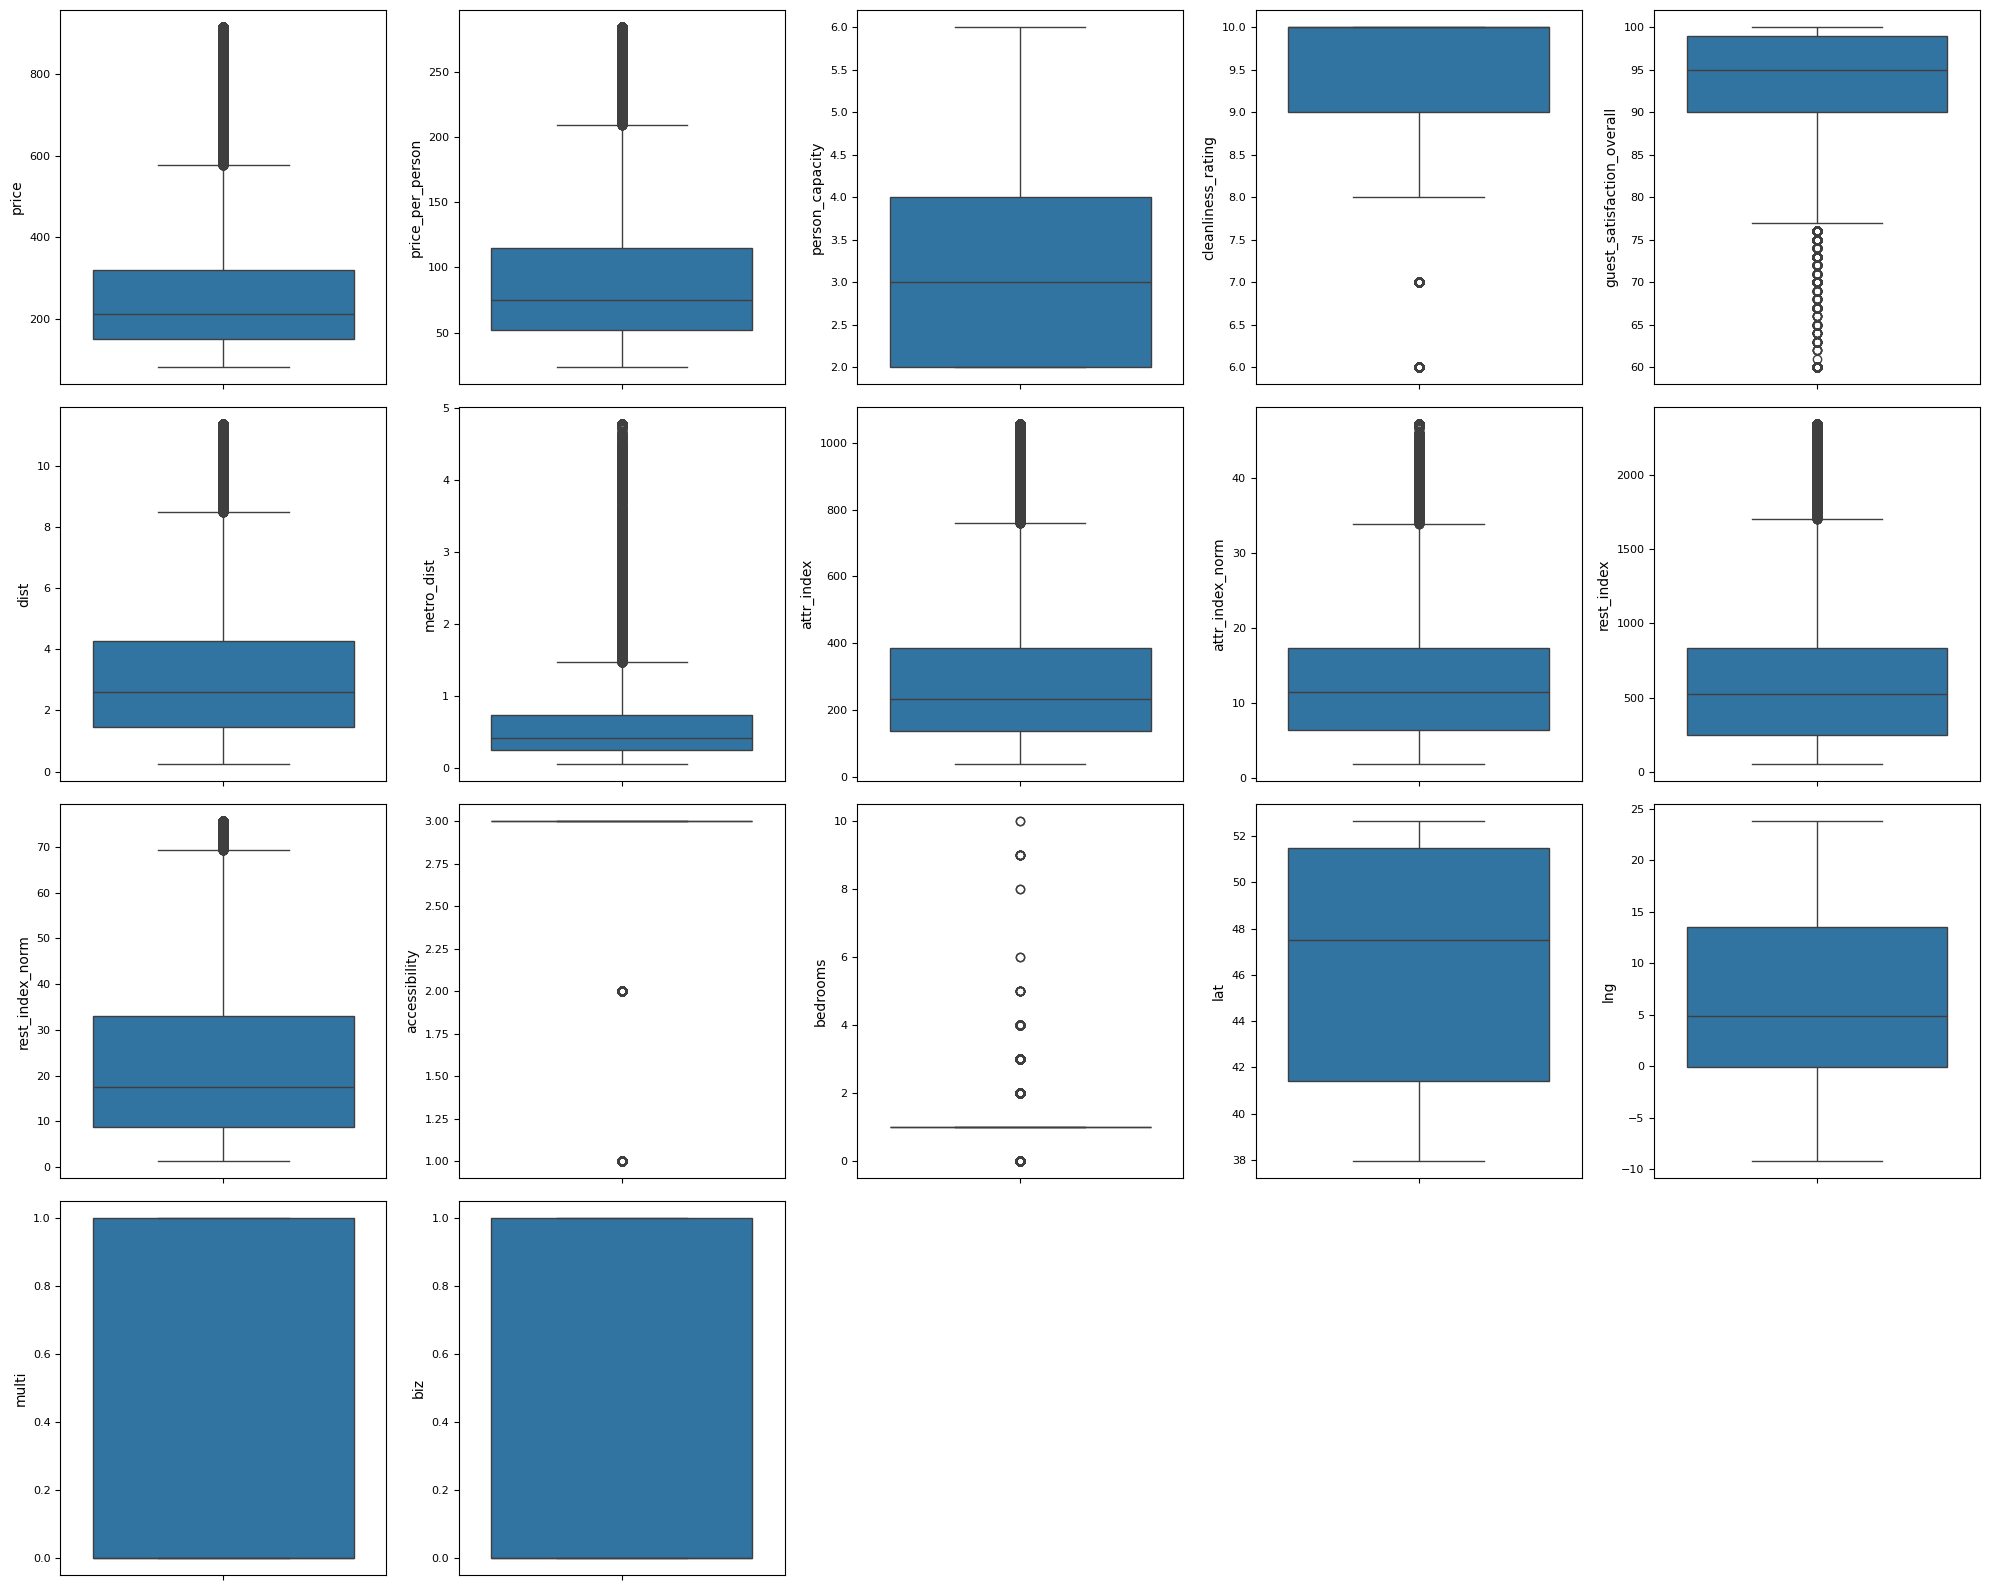

In [ ]:
features = ['price','price_per_person','person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm','accessibility', 'bedrooms','lat','lng','multi','biz']

# Tentukan jumlah fitur
num_features = len(features)

# Menentukan jumlah baris dan kolom
cols = 5  # Tetapkan jumlah kolom tetap 5
rows = (num_features // cols) + (num_features % cols > 0)  # Menyesuaikan jumlah baris

# Membuat figure dengan ukuran yang sesuai
plt.figure(figsize=(cols * 4, rows * 4))

for i in range(num_features):
    plt.subplot(rows, cols, i + 1)  # Menyesuaikan grid
    sns.boxplot(y=europe_airbnb[features[i]])  # Menampilkan boxplot
    plt.ylabel(features[i])
    plt.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()  # Menyusun layout secara rapi
plt.show()

### **7. Log Transformasi**

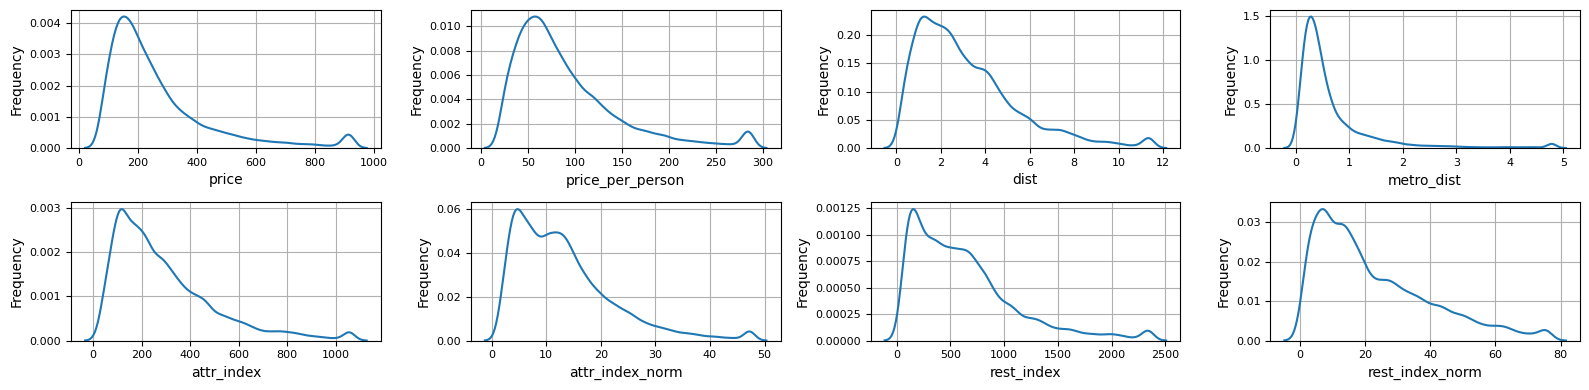

In [ ]:
before = ['price', 'price_per_person','dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']
features = before
rcParams['figure.figsize'] = 16, 4
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=europe_airbnb[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()
plt.savefig('before.png')

Delapan kolom memiliki persebaran data yang right skewed sehingga diperlukan transformasi dengan menggunakan log_transformation.

In [ ]:
# Melakukan Log Transformation pada Feature yang Right Skewed
europe_airbnb['price']=np.log(europe_airbnb['price'])
europe_airbnb['price_per_person']=np.log(europe_airbnb['price_per_person'])
europe_airbnb['dist']=np.log(europe_airbnb['dist'])
europe_airbnb['metro_dist']=np.log(europe_airbnb['metro_dist'])
europe_airbnb['attr_index']=np.log(europe_airbnb['attr_index'])
europe_airbnb['attr_index_norm']=np.log(europe_airbnb['attr_index_norm'])
europe_airbnb['rest_index']=np.log(europe_airbnb['rest_index'])
europe_airbnb['rest_index_norm']=np.log(europe_airbnb['rest_index_norm'])

In [ ]:
europe_airbnb.head()

price  room_shared  room_private  person_capacity  host_is_superhost  \
0  5.268032            0             1                2                  0   
1  5.841356            0             1                4                  0   
2  5.576333            0             1                2                  0   
3  6.071960            0             1                4                  0   
4  6.185288            0             1                2                  1   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  ...  \
0      1    0                  10                          93         1  ...   
1      0    0                   8                          85         1  ...   
2      0    1                   9                          87         1  ...   
3      0    1                   9                          90         2  ...   
4      0    0                  10                          98         1  ...   

   kota_lisbon  kota_london  kota_paris  kota_rome  kota_vienna  \
0            0            0           0          0            0   
1            0            0           0          0            0   
2            0            0           0          0            0   
3            0            0           0          0            0   
4            0            0           0          0            0   

   Entire home/apt  Private room  Shared room  price_per_person  accessibility  
0                0             1            0          4.574885              2  
1                0             1            0          4.455062              3  
2                0             1            0          4.883186              2  
3                0             1            0          4.685665              3  
4                0             1            0          5.492141              3  

[5 rows x 34 columns]

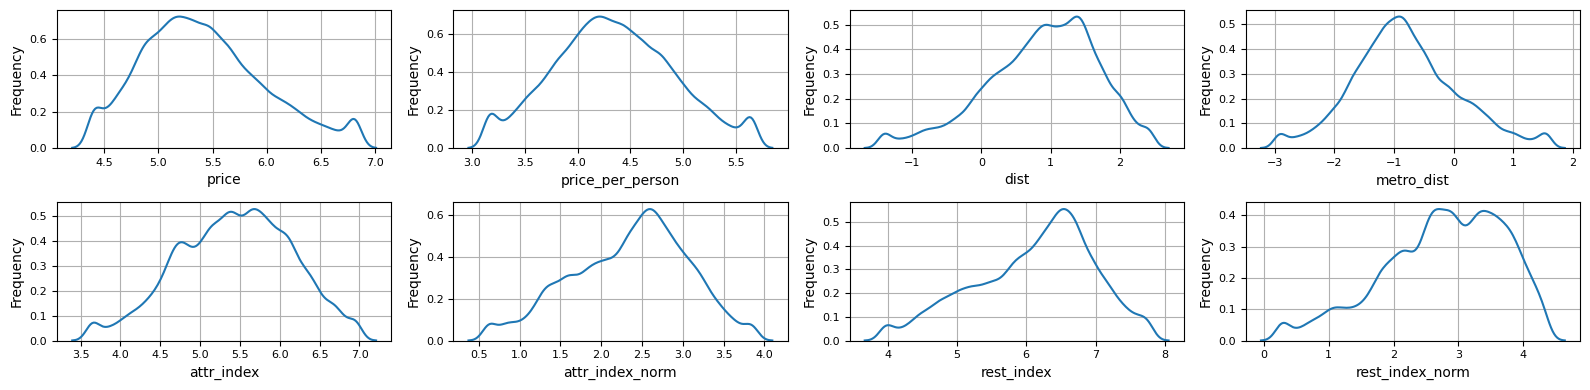

In [ ]:
log_transformation = ['price', 'price_per_person','dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']
features = log_transformation
rcParams['figure.figsize'] = 16, 4
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=europe_airbnb[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()
plt.savefig('after.png')

Setelah dilakukan transformasi dengan menggunakan log_transformation, terdapat perubahan bentuk persebaran data dari yang awalnya right skewed menjadi rata.

In [ ]:
numerical = ['price','price_per_person','person_capacity', 'cleanliness_rating',
             'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index',
             'attr_index_norm', 'rest_index', 'rest_index_norm','accessibility',
             'bedrooms','lat','lng','host_is_superhost','biz','Entire home/apt', 'multi','kota_amsterdam','kota_athens','kota_barcelona','kota_berlin','kota_budapest','kota_lisbon','kota_london','kota_paris','kota_rome','kota_vienna', 'Shared room','Private room']

# Hitung deskripsi statistik standar
desc = europe_airbnb[numerical].describe().T

# Tampilkan tabel dengan mean, count, std, min, 25%, 50%, 75%, max di baris
print(desc)

                              count       mean       std        min  \
price                       51707.0   5.415147  0.566116   4.395457   
price_per_person            51707.0   4.344087  0.574470   3.161799   
person_capacity             51707.0   3.161661  1.298545   2.000000   
cleanliness_rating          51707.0   9.409461  0.851447   6.000000   
guest_satisfaction_overall  51707.0  92.816853  7.849934  60.000000   
dist                        51707.0   0.875023  0.800175  -1.409768   
metro_dist                  51707.0  -0.820285  0.881152  -2.931400   
attr_index                  51707.0   5.431831  0.717298   3.640380   
attr_index_norm             51707.0   2.353799  0.709088   0.615731   
rest_index                  51707.0   6.114860  0.859062   3.964462   
rest_index_norm             51707.0   2.769022  0.924400   0.270511   
accessibility               51707.0   2.822519  0.389051   1.000000   
bedrooms                    51707.0   1.158760  0.627410   0.000000   
lat   

### **8. Handle Class Imbalance**

Terdapat class imbalance pada feature room_type dengan values shared rooms jauh berbeda dengan kedua values. Namun, class imbalance tidak dilakukan handling class imbalance.

### **9. Feature Selection**

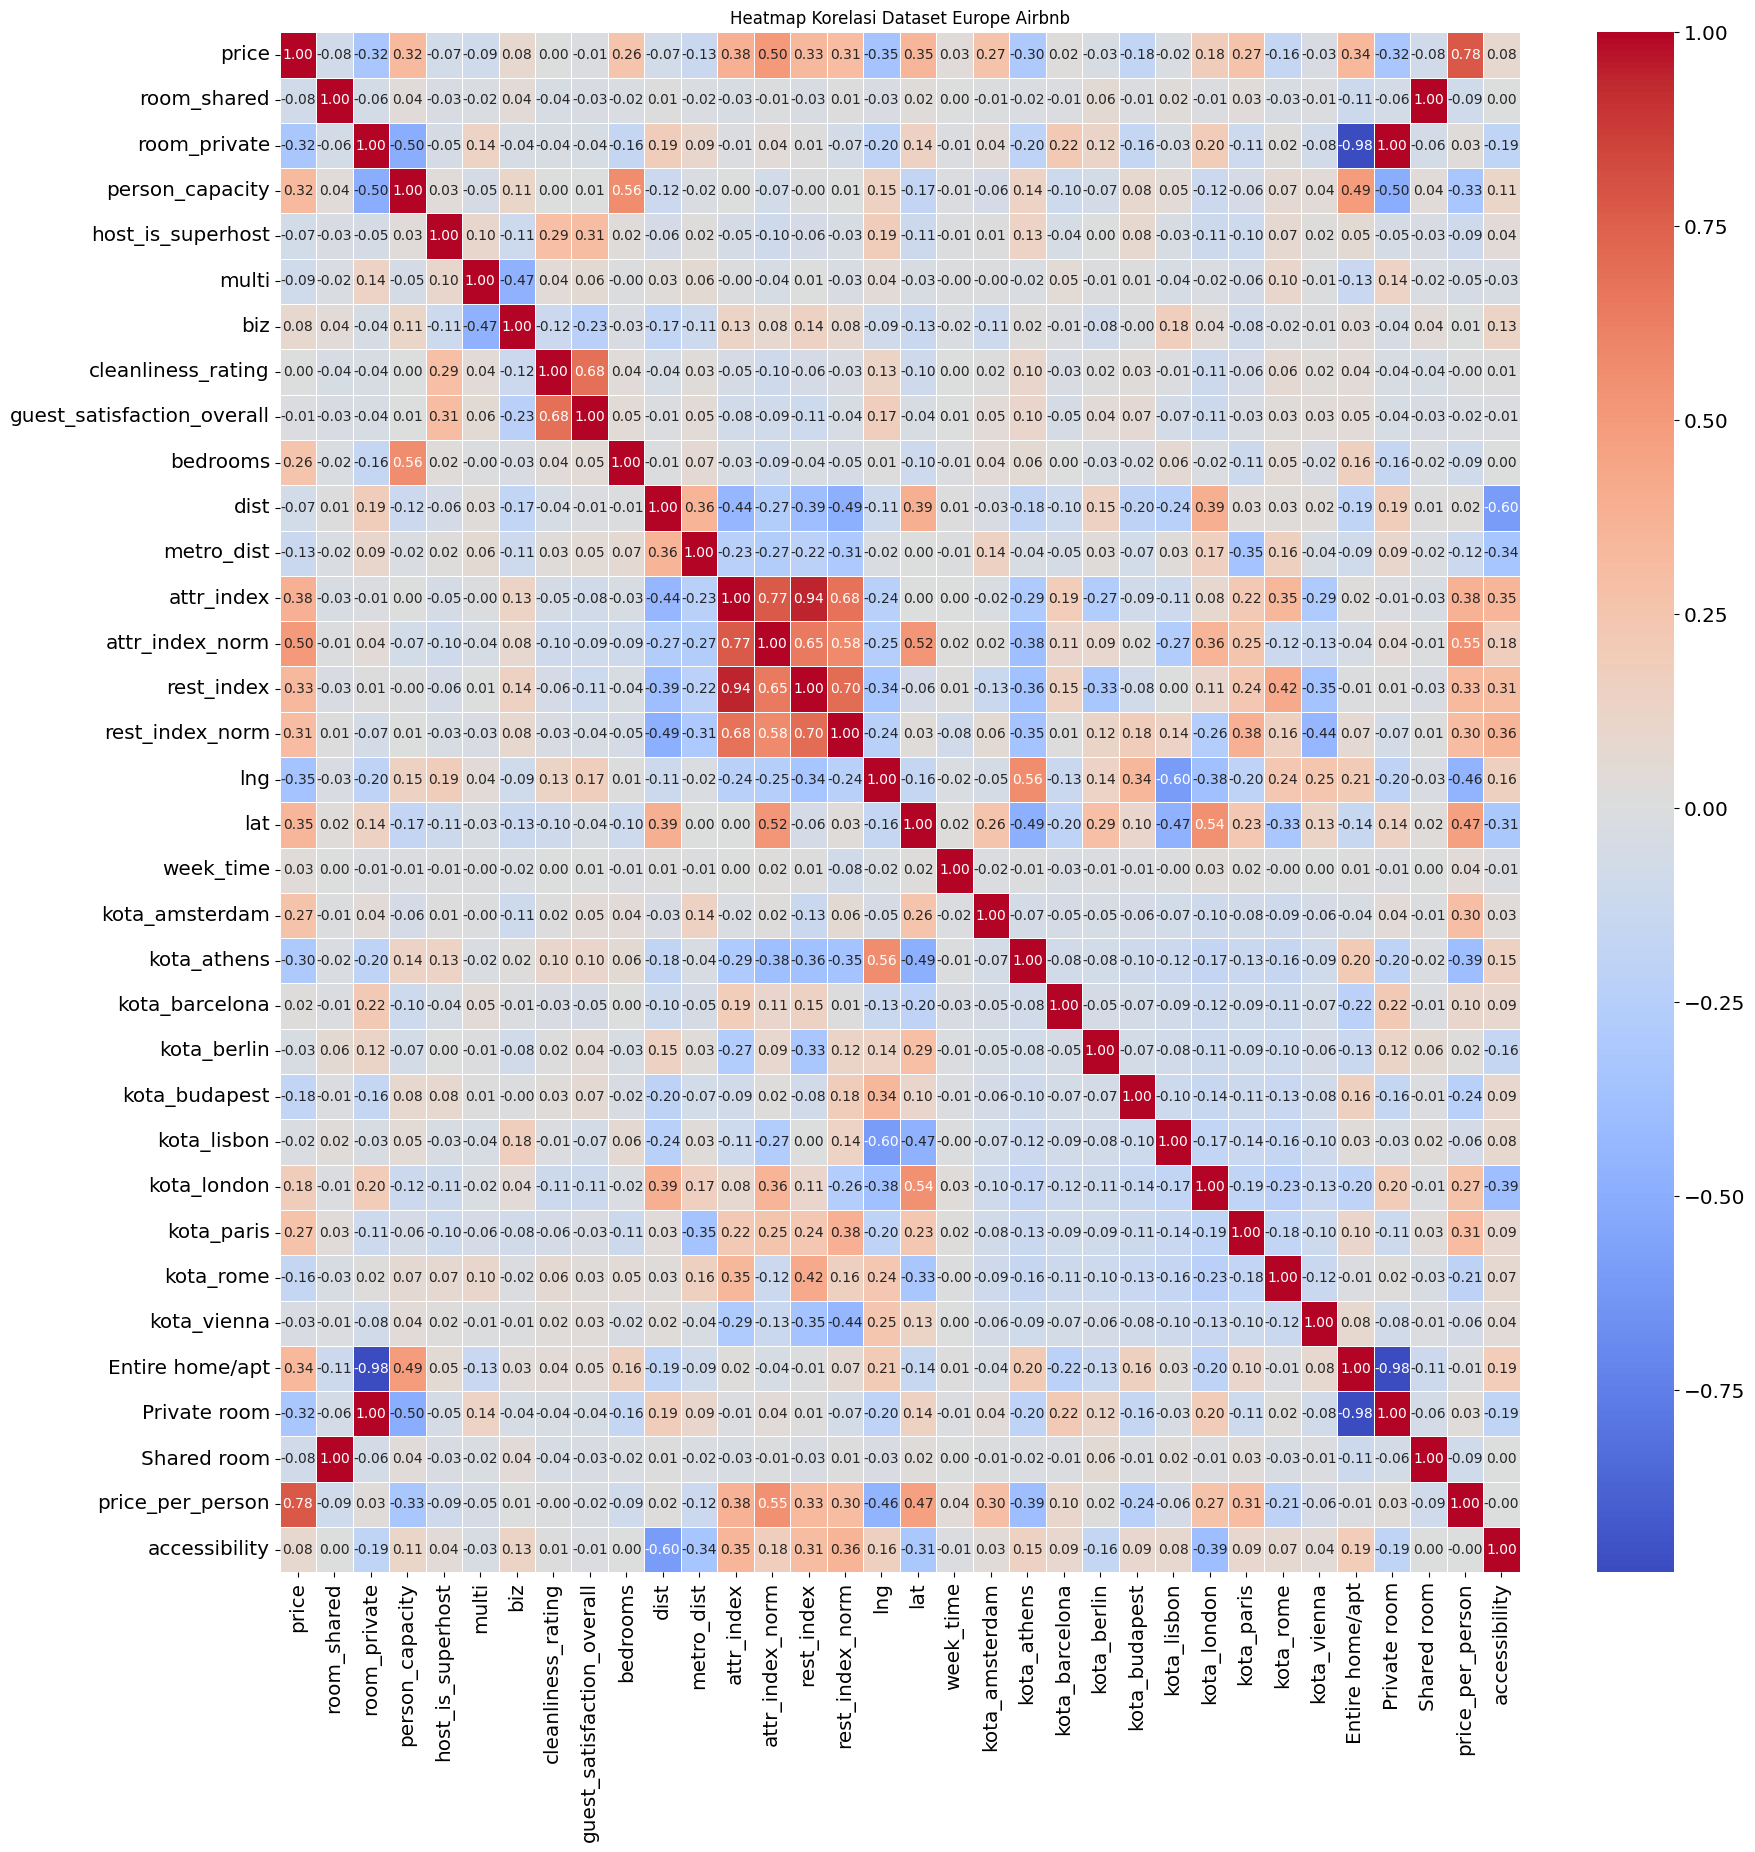

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = europe_airbnb.corr()

# Membuat heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Dataset Europe Airbnb")
plt.show()

Kolom Entire home/apt, attr_index, rest_index_norm, week_time, cleanliness_rating, room_shared, multi, room_private dihapus karena merupakan data redundant yang terlihat dari korelasi yang sangat kuat antar dua feature.



### **10. Korelasi Feature Terhadap Price**

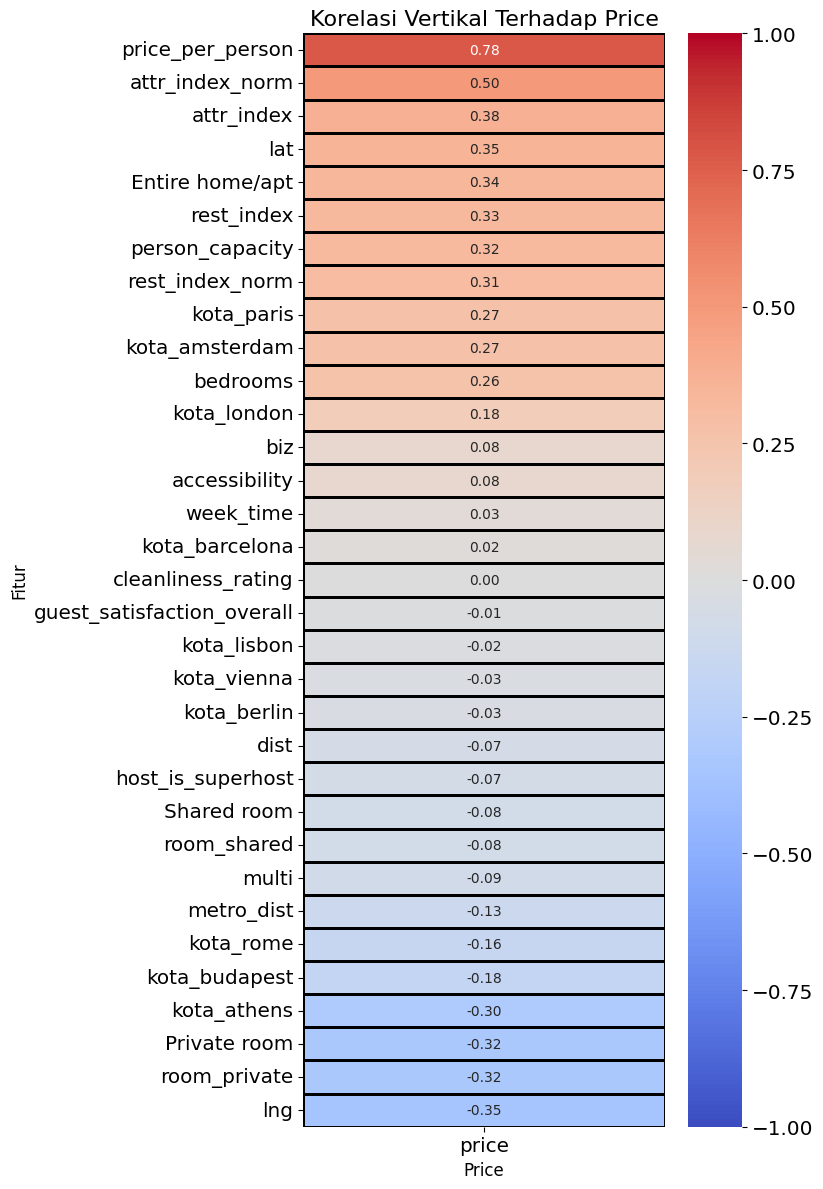

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antara semua kolom numerik
correlation_matrix = europe_airbnb.corr()

# Memilih kolom yang berkaitan dengan 'price' dan mengurutkan berdasarkan korelasi terhadap 'price'
price_correlation = correlation_matrix['price'].drop('price').sort_values(ascending=False)

# Membuat heatmap untuk korelasi terhadap 'price'
plt.figure(figsize=(8, 12))
sns.heatmap(price_correlation.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, fmt='.2f', linewidths=1, linecolor='black')

# Menambahkan judul dan label
plt.title('Korelasi Vertikal Terhadap Price', fontsize=16)
plt.ylabel('Fitur', fontsize=12)
plt.xlabel('Price', fontsize=12)
plt.tight_layout()

# Menyimpan heatmap
plt.savefig('heatmap_price_correlation_with_boxes.png')

# Menampilkan plot
plt.show()

In [ ]:
europe_airbnb.drop(columns=['attr_index','rest_index_norm','week_time','room_shared','room_private'], inplace=True)

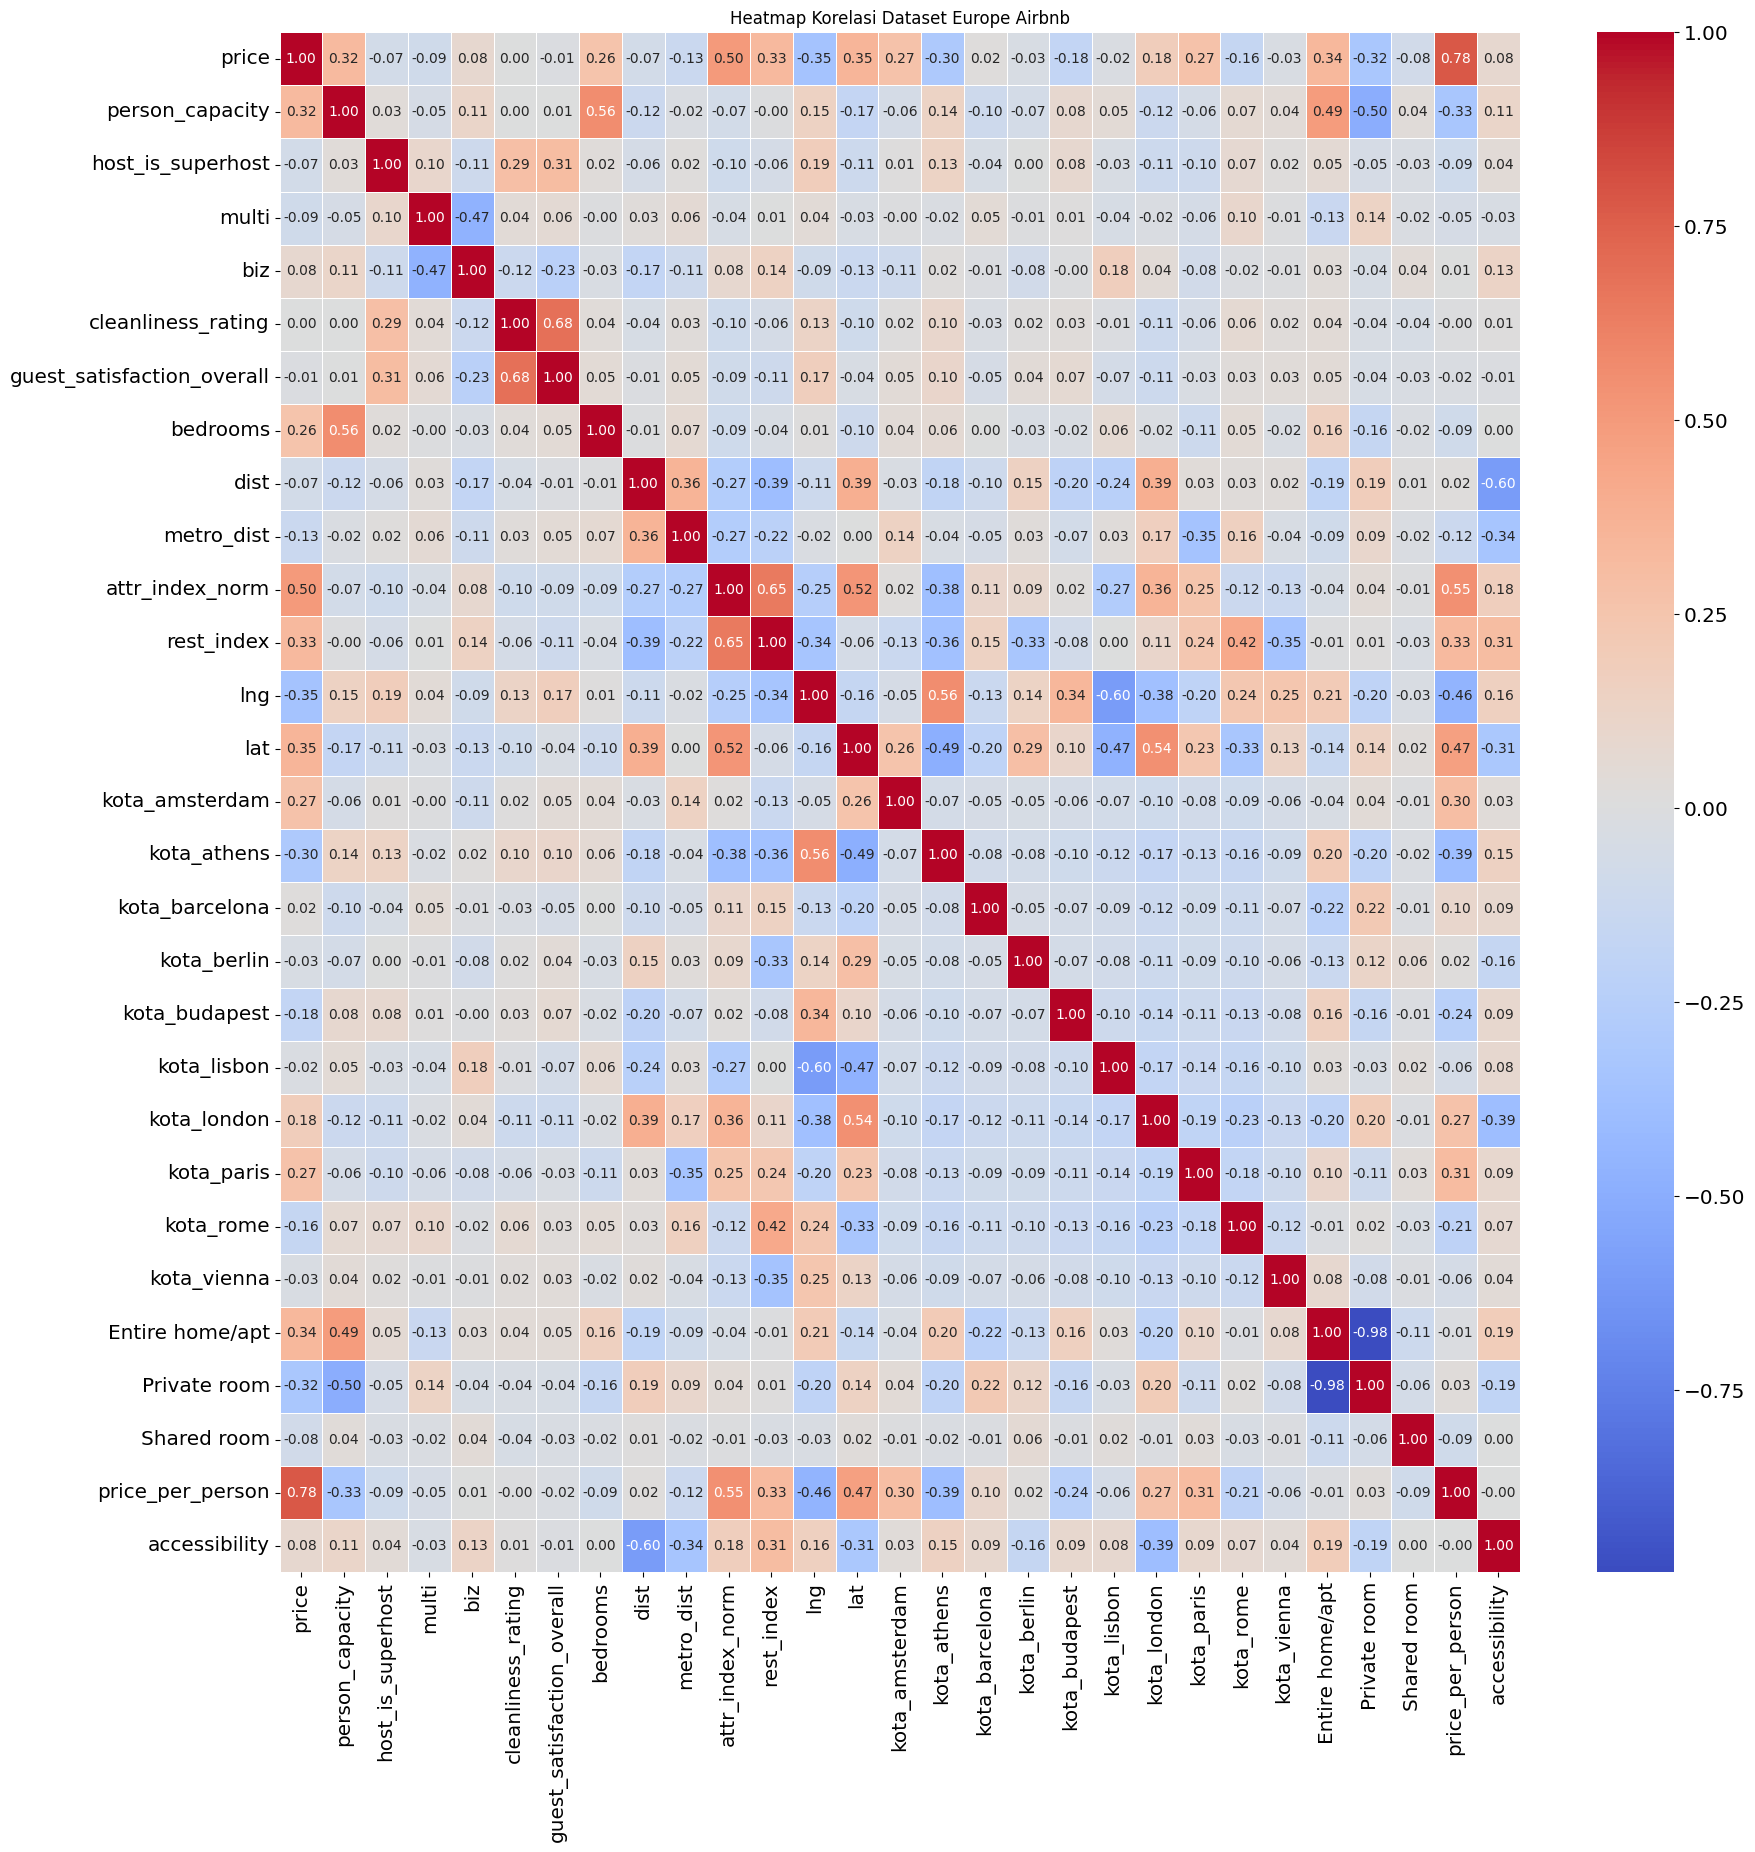

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = europe_airbnb.corr()

# Membuat heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Dataset Europe Airbnb")
plt.show()

### **11. Normalization/Standardization**

#### **Standarisasi**

Standariasi akan dilakukan setelah proses Split Train and Test untuk menghindari data leakage.

## **F. Split Train dan Test Dataset**

Split train and test dilakukan dengan memisahkan antara data training dan data test. Data training dilakukan standarisasi dengan menggunakan MinMaxScaler.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Kolom yang akan di-scaling
columns_to_scale = ['cleanliness_rating','price_per_person','bedrooms','person_capacity',
            'guest_satisfaction_overall', 'dist', 'metro_dist','accessibility',
            'attr_index_norm', 'rest_index',
            'lat', 'lng']
columns_not_to_scale = ['host_is_superhost','biz','Entire home/apt', 'multi','kota_amsterdam','kota_athens','kota_barcelona','kota_berlin','kota_budapest','kota_lisbon','kota_london','kota_paris','kota_rome','kota_vienna', 'Shared room','Private room']

columns_to_include = columns_to_scale + columns_not_to_scale

# Pisahkan dataset menjadi fitur dan target
X = europe_airbnb[columns_to_include]  # Fitur
y = europe_airbnb['price']  # Target

# Split data menjadi train dan test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Lakukan scaling pada data train dan test
X_train_scaled = scaler.fit_transform(X_train)  # Fit dan transform pada data train
X_test_scaled = scaler.transform(X_test)  # Transform hanya pada data test

# Convert hasil scaling menjadi DataFrame untuk memudahkan manipulasi
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_to_include)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_to_include)

# Menampilkan hasil untuk verifikasi
print("Data Train Setelah Scaling:")
print(X_train_scaled.head())
print("\nData Test Setelah Scaling:")
print(X_test_scaled.head())

Data Train Setelah Scaling:
   cleanliness_rating  price_per_person  bedrooms  person_capacity  \
0           -0.478941          0.361376 -0.252962        -0.122419   
1            0.692292         -1.398174 -0.252962         0.648452   
2            0.692292         -0.414359  1.342367         0.648452   
3           -0.478941          0.340343 -0.252962        -0.893289   
4           -0.478941         -0.063815 -1.848290        -0.122419   

   guest_satisfaction_overall      dist  metro_dist  accessibility  \
0                    0.151940  0.732237   -0.059516       0.455777   
1                    0.913758  0.471496   -0.556904       0.455777   
2                    0.913758 -0.999575    0.741772       0.455777   
3                    0.151940  0.906690    1.516895       0.455777   
4                    0.405879  0.996577    2.617085      -2.114182   

   attr_index_norm  rest_index  ...  kota_barcelona  kota_berlin  \
0         1.193200    0.522510  ...       -0.240908    -0.2251

## **G. Modelling**

### **1. Linear Regression**

#####Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#####Measurement

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  0.05953558590056128
Testing MAE:  0.05972323618051578
Training RMSE:  0.08236440398367577
Testing RMSE:  0.08300906004654701
Training R2 Score:  0.9787944660506296
Testing R2 Score:  0.978651137527525


####Cross Validation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Inisialisasi model Linear Regression
model = LinearRegression()

# Cross-validation dengan 5-fold untuk MAE
cv_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validation MAE: {cv_mae}')
print(f'Mean Cross-validation MAE: {cv_mae.mean()}')

# Cross-validation dengan 5-fold untuk R² (koefisien determinasi)
cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validation R²: {cv_r2}')
print(f'Mean Cross-validation R²: {cv_r2.mean()}')

# Cross-validation dengan 5-fold untuk RMSE
cv_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f'Cross-validation RMSE: {cv_rmse}')
print(f'Mean Cross-validation RMSE: {cv_rmse.mean()}')

# Fit model ke data training
model.fit(X_train, y_train)

# Evaluasi pada data training
y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print("\nPerformance on Training Data:")
print(f"MAE: {train_mae}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")

# Evaluasi pada data testing
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("\nPerformance on Testing Data:")
print(f"MAE: {test_mae}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

Cross-validation MAE: [-0.06015821 -0.06033317 -0.05929765 -0.05875598 -0.05934298]
Mean Cross-validation MAE: -0.059577599764962574
Cross-validation R²: [0.97842229 0.9775848  0.97883576 0.97971104 0.97924237]
Mean Cross-validation R²: 0.9787592523619114
Cross-validation RMSE: [-0.08373918 -0.0851502  -0.08251899 -0.07934304 -0.08138037]
Mean Cross-validation RMSE: -0.0824263567159618

Performance on Training Data:
MAE: 0.05953558590056128
RMSE: 0.08236440398367577
R²: 0.9787944660506296

Performance on Testing Data:
MAE: 0.05972323618051578
RMSE: 0.08300906004654701
R²: 0.978651137527525


### **2. Ridge**

#####Modelling

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

#####Measurement

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  0.05953547610142598
Testing MAE:  0.05972895374944214
Training RMSE:  0.08236656182027008
Testing RMSE:  0.08300677315317151
Training R2 Score:  0.9787933549231438
Testing R2 Score:  0.9786523138304396


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import uniform
import numpy as np

# Tentukan hyperparameter yang akan dituning dengan distribusi acak
param_dist = {
    'alpha': uniform(0.1, 10),  # Nilai alpha untuk regularisasi
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'],  # Pilihan solver
}

# Melakukan pencarian hyperparameter terbaik
n_iter_search = 100  # Jumlah iterasi pencarian
best_score = -np.inf
best_params = None

for _ in range(n_iter_search):
    # Sampling hyperparameter acak
    params = {
        'alpha': param_dist['alpha'].rvs(),
        'solver': np.random.choice(param_dist['solver']),
    }

    # Inisialisasi model dengan parameter acak
    model = Ridge(random_state=42, **params)
    model.fit(X, y)
    y_pred = model.predict(X)  # Perbaiki prediksi menggunakan model yang benar

    # Evaluasi dengan MAE
    mae = mean_absolute_error(y, y_pred)
    score = -mae  # Negasi MAE karena kita memaksimalkan skor

    # Update jika skor lebih baik
    if score > best_score:
        best_score_rid = score
        best_params_rid = params
        best_model_rid = model  # Simpan model terbaik

# Menampilkan hasil terbaik
print("Best Hyperparameters: ", best_params_rid)
print("Best Score (MAE): ", -best_score_rid)

# Evaluasi akhir dengan model terbaik
y_pred_rid = best_model_rid.predict(X)  # Perbaiki prediksi menggunakan best_model_rid
mae_rid = mean_absolute_error(y, y_pred_rid)
rmse_rid = mean_squared_error(y, y_pred_rid, squared=False)
r2_rid = r2_score(y, y_pred_rid)

print(f"Final MAE: {mae_rid}")
print(f"Final RMSE: {rmse_rid}")
print(f"Final R2 Score: {r2_rid}")

Best Hyperparameters:  {'alpha': 2.737127414445091, 'solver': 'auto'}
Best Score (MAE):  0.059637073933132057
Final MAE: 0.059637073933132057
Final RMSE: 0.08248724440746943
Final R2 Score: 0.9787689872202936


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation pada data training untuk perbandingan
cv_mae_rid = cross_val_score(best_model_rid, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_rid = cross_val_score(best_model_rid, X_train, y_train, cv=5, scoring='r2')
cv_rmse_rid = cross_val_score(best_model_rid, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Menampilkan hasil cross-validation
print("\nCross-validation Results:")
print(f"Cross-validation MAE: {cv_mae_rid}")
print(f"Mean Cross-validation MAE: {cv_mae_rid.mean()}")
print(f"Cross-validation R²: {cv_r2_rid}")
print(f"Mean Cross-validation R²: {cv_r2_rid.mean()}")
print(f"Cross-validation RMSE: {cv_rmse_rid}")
print(f"Mean Cross-validation RMSE: {cv_rmse_rid.mean()}")


Cross-validation Results:
Cross-validation MAE: [-0.06013779 -0.06032886 -0.05930144 -0.05873743 -0.05934263]
Mean Cross-validation MAE: -0.05956962833248482
Cross-validation R²: [0.97842764 0.97758063 0.97883489 0.979719   0.97923593]
Mean Cross-validation R²: 0.9787596163716714
Cross-validation RMSE: [-0.08372881 -0.08515813 -0.08252069 -0.07932747 -0.081393  ]
Mean Cross-validation RMSE: -0.08242561885771517


### **3. Lasso**

#####Modelling

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

#####Measurement

In [ ]:
from sklearn.metrics import mean_absolute_error

# Prediksi
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  0.4314946117131643
Testing MAE:  0.4331078888875382
Training RMSE:  0.5393191864767992
Testing RMSE:  0.5401975675997656
Training R2 Score:  0.09079496167018264
Testing R2 Score:  0.09587392210424539


### **4. ElasticNet**

#####Modelling

In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

ElasticNet()

#####Measurement

In [ ]:
from sklearn.metrics import mean_absolute_error

# Prediksi
y_train_pred = elasticnet_model.predict(X_train)
y_test_pred = elasticnet_model.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  0.4085125143380398
Testing MAE:  0.4089868285973161
Training RMSE:  0.5122609173356878
Testing RMSE:  0.5118728763420409
Training R2 Score:  0.17973810321165307
Testing R2 Score:  0.188201990975994


### **5. Decision Tree Regressor**

#####Modelling

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

#####Measurement

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  3.858522881116652e-12
Testing MAE:  0.002209187907527769
Training RMSE:  3.637089411923764e-10
Testing RMSE:  0.021085450254411796
Training R2 Score:  1.0
Testing R2 Score:  0.998622506666223


#####Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint
import numpy as np

# Inisialisasi model Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)

# Tentukan hyperparameter yang akan dituning dengan distribusi acak
param_dist = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  # Nilai valid untuk criterion
    'max_depth': randint(3, 20),  # Kedalaman pohon
    'min_samples_split': randint(2, 11),  # Minimum sampel untuk pembagian node
    'min_samples_leaf': randint(1, 11),   # Minimum sampel untuk daun node
    'max_features': ['sqrt', 'log2', None],  # Pilihan untuk max_features yang valid
    'splitter': ['best', 'random']  # Pilihan untuk splitter
}

# Melakukan pencarian hyperparameter terbaik
n_iter_search = 100  # Jumlah iterasi pencarian
best_score_dt = -np.inf  # Inisialisasi dengan skor yang sangat rendah
best_params_dt = None
best_model_dt = None

for _ in range(n_iter_search):
    # Sampling hyperparameter acak
    params = {
        'criterion': np.random.choice(param_dist['criterion']),
        'max_depth': param_dist['max_depth'].rvs(),
        'min_samples_split': param_dist['min_samples_split'].rvs(),
        'min_samples_leaf': param_dist['min_samples_leaf'].rvs(),
        'max_features': np.random.choice(param_dist['max_features']),
        'splitter': np.random.choice(param_dist['splitter']),
    }

    # Inisialisasi model dengan parameter acak
    model = DecisionTreeRegressor(random_state=42, **params)
    model.fit(X, y)
    y_pred = model.predict(X)

    # Evaluasi dengan MAE
    mae = mean_absolute_error(y, y_pred)
    score = -mae  # Negasi MAE karena kita memaksimalkan skor

    # Update jika skor lebih baik
    if score > best_score_dt:
        best_score_dt = score
        best_params_dt = params
        best_model_dt = model  # Simpan model terbaik

# Menampilkan hasil terbaik
print("Best Hyperparameters: ", best_params_dt)
print("Best Score (MAE): ", -best_score_dt)

# Evaluasi akhir dengan model terbaik
y_pred = best_model_dt.predict(X)
mae_dt = mean_absolute_error(y, y_pred)
rmse_dt = mean_squared_error(y, y_pred, squared=False)
r2_dt = r2_score(y, y_pred)

print(f"Final MAE: {mae_dt}")
print(f"Final RMSE: {rmse_dt}")
print(f"Final R2 Score: {r2_dt}")

Best Hyperparameters:  {'criterion': 'squared_error', 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None, 'splitter': 'best'}
Best Score (MAE):  0.0016329972655086738
Final MAE: 0.0016329972655086738
Final RMSE: 0.01297531132536231
Final R2 Score: 0.9994746694053979


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#####Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation pada data training untuk perbandingan
cv_mae_dt = cross_val_score(best_model_dt, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_dt = cross_val_score(best_model_dt, X_train, y_train, cv=5, scoring='r2')
cv_rmse_dt = cross_val_score(best_model_dt, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Menampilkan hasil cross-validation
print("\nCross-validation Results:")
print(f"Cross-validation MAE: {cv_mae_dt}")
print(f"Mean Cross-validation MAE: {cv_mae_dt.mean()}")
print(f"Cross-validation R²: {cv_r2_dt}")
print(f"Mean Cross-validation R²: {cv_r2_dt.mean()}")
print(f"Cross-validation RMSE: {cv_rmse_dt}")
print(f"Mean Cross-validation RMSE: {cv_rmse_dt.mean()}")


Cross-validation Results:
Cross-validation MAE: [-0.00357667 -0.0033706  -0.00310597 -0.00296538 -0.00348644]
Mean Cross-validation MAE: -0.0033010111870966355
Cross-validation R²: [0.99789036 0.99814595 0.99847147 0.99844978 0.99802203]
Mean Cross-validation R²: 0.9981959206051185
Cross-validation RMSE: [-0.02618366 -0.02448921 -0.02217629 -0.02193183 -0.0251212 ]
Mean Cross-validation RMSE: -0.023980438987263535


### **6. Random Forest Regressor**

#####Modelling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#####Measurement

In [ ]:
from sklearn.metrics import mean_absolute_error

# Prediksi
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  0.0009079337775395286
Testing MAE:  0.002493274848606451
Training RMSE:  0.006696277966357908
Testing RMSE:  0.01787027493058211
Training R2 Score:  0.9998598358206715
Testing R2 Score:  0.9990105674001287


#####Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform
import numpy as np

# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Tentukan hyperparameter yang akan dituning dengan distribusi acak
param_dist = {
    'n_estimators': randint(50, 200),  # Jumlah pohon
    'max_depth': randint(3, 20),  # Kedalaman pohon
    'min_samples_split': randint(2, 11),  # Minimum sampel untuk pembagian node
    'min_samples_leaf': randint(1, 11),   # Minimum sampel untuk daun node
    'max_features': ['sqrt', 'log2', None],  # Pilihan untuk max_features yang valid
    'bootstrap': [True, False],  # Memilih untuk bootstrap atau tidak
}

# Melakukan pencarian hyperparameter terbaik
n_iter_search = 100  # Jumlah iterasi pencarian
best_score_rf = -np.inf  # Inisialisasi dengan skor yang sangat rendah
best_params_rf = None
best_model_rf = None

for _ in range(n_iter_search):
    # Sampling hyperparameter acak
    params = {
        'n_estimators': param_dist['n_estimators'].rvs(),
        'max_depth': param_dist['max_depth'].rvs(),
        'min_samples_split': param_dist['min_samples_split'].rvs(),
        'min_samples_leaf': param_dist['min_samples_leaf'].rvs(),
        'max_features': np.random.choice(param_dist['max_features']),
        'bootstrap': np.random.choice(param_dist['bootstrap']),
    }

    # Inisialisasi model dengan parameter acak
    model = RandomForestRegressor(random_state=42, **params)
    model.fit(X, y)
    y_pred = model.predict(X)

    # Evaluasi dengan MAE
    mae = mean_absolute_error(y, y_pred)
    score = -mae  # Negasi MAE karena kita memaksimalkan skor

    # Update jika skor lebih baik
    if score > best_score_rf:
        best_score_rf = score
        best_params_rf = params
        best_model_rf = model  # Simpan model terbaik

# Menampilkan hasil terbaik
print("Best Hyperparameters: ", best_params_rf)
print("Best Score (MAE): ", -best_score_rf)

# Evaluasi akhir dengan model terbaik
y_pred_rf = best_model_rf.predict(X)
mae_rf = mean_absolute_error(y, y_pred_rf)
rmse_rf = mean_squared_error(y, y_pred_rf, squared=False)
r2_rf = r2_score(y, y_pred_rf)

print(f"Final MAE: {mae_rf}")
print(f"Final RMSE: {rmse_rf}")
print(f"Final R² Score: {r2_rf}")

Best Hyperparameters:  {'n_estimators': 59, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}
Best Score (MAE):  0.001519174988500175
Final MAE: 0.001519174988500175
Final RMSE: 0.010831102239202932
Final R² Score: 0.9996339482975292


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#####Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation pada data training untuk perbandingan
cv_mae_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='r2')
cv_rmse_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Menampilkan hasil cross-validation
print("\nCross-validation Results:")
print(f"Cross-validation MAE: {cv_mae_rf}")
print(f"Mean Cross-validation MAE: {cv_mae_rf.mean()}")
print(f"Cross-validation R²: {cv_r2_rf}")
print(f"Mean Cross-validation R²: {cv_r2_rf.mean()}")
print(f"Cross-validation RMSE: {cv_rmse_rf}")
print(f"Mean Cross-validation RMSE: {cv_rmse_rf.mean()}")


Cross-validation Results:
Cross-validation MAE: [-0.00309579 -0.00287987 -0.00309568 -0.00259791 -0.00317071]
Mean Cross-validation MAE: -0.0029679908712408566
Cross-validation R²: [0.99869545 0.9988034  0.99867199 0.99888717 0.99855088]
Mean Cross-validation R²: 0.998721777396451
Cross-validation RMSE: [-0.02059003 -0.01967385 -0.02067062 -0.01858203 -0.02150218]
Mean Cross-validation RMSE: -0.020203741165805596


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Feature importance
importance = pd.Series(model.feature_importances_, index=X_train.columns)
print(importance.sort_values(ascending=False))

price_per_person              7.440994e-01
person_capacity               2.539546e-01
lng                           3.676692e-04
metro_dist                    2.745237e-04
rest_index                    2.651881e-04
lat                           2.230623e-04
attr_index_norm               2.022701e-04
dist                          1.836410e-04
guest_satisfaction_overall    1.440112e-04
cleanliness_rating            5.023251e-05
multi                         5.021037e-05
bedrooms                      4.227904e-05
biz                           4.207495e-05
host_is_superhost             2.638088e-05
Shared room                   1.717515e-05
Entire home/apt               1.436296e-05
Private room                  1.429130e-05
kota_paris                    5.854548e-06
kota_amsterdam                4.074334e-06
kota_lisbon                   3.638279e-06
accessibility                 2.672418e-06
kota_rome                     2.514961e-06
kota_budapest                 2.398578e-06
kota_london

### **7. Gradient Boosting Regressor**

#####Modelling and Measurement

In [ ]:
# Import library yang dibutuhkan
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membuat model Gradient Boosting
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training model
gb_regressor.fit(X_train, y_train)

# Prediksi pada data training dan testing
y_train_pred = gb_regressor.predict(X_train)
y_test_pred = gb_regressor.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  0.016568701176452785
Testing MAE:  0.01707290013362461
Training RMSE:  0.029961918978584665
Testing RMSE:  0.03077890432823871
Training R2 Score:  0.997193859946228
Testing R2 Score:  0.9970648516356642


#####Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform
import numpy as np

# Data simulasi jika diperlukan
# X, y = ...  # Pastikan X dan y sudah diinisialisasi

# Hyperparameter yang akan dituning
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'subsample': uniform(0.5, 0.5),  # Rentang 0.5 hingga 1.0
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']
}

n_iter_search = 100
best_score_gb = -np.inf
best_params_gb = None
best_model_gb = None

for _ in range(n_iter_search):
    params = {
        'n_estimators': param_dist['n_estimators'].rvs(),
        'learning_rate': max(0.01, min(param_dist['learning_rate'].rvs(), 1.0)),
        'max_depth': param_dist['max_depth'].rvs(),
        'min_samples_split': max(2, param_dist['min_samples_split'].rvs()),
        'subsample': max(0.5, min(param_dist['subsample'].rvs(), 1.0)),
        'loss': np.random.choice(param_dist['loss']),
    }

    try:
        model = GradientBoostingRegressor(random_state=42, **params)
        model.fit(X, y)
        y_pred = model.predict(X)
        mae = mean_absolute_error(y, y_pred)
        score = -mae

        if score > best_score_gb:
            best_score_gb = score
            best_params_gb = params
            best_model_gb = model
    except Exception as e:
        print(f"Error pada iterasi ini: {e}")
        continue

print("Best Hyperparameters: ", best_params_gb)
print("Best Score (MAE): ", -best_score_gb)

# Evaluasi akhir dengan model terbaik
y_pred_gb = best_model_gb.predict(X)
mae_gb = mean_absolute_error(y, y_pred_gb)
rmse_gb = mean_squared_error(y, y_pred_gb, squared=False)
r2_gb = r2_score(y, y_pred_gb)

print(f"Final MAE: {mae_gb}")
print(f"Final RMSE: {rmse_gb}")
print(f"Final R² Score: {r2_gb}")

Best Hyperparameters:  {'n_estimators': 145, 'learning_rate': 0.13889049419239347, 'max_depth': 16, 'min_samples_split': 2, 'subsample': 0.9276124954247573, 'loss': 'squared_error'}
Best Score (MAE):  1.340365254191936e-06
Final MAE: 1.340365254191936e-06
Final RMSE: 7.564137508736305e-06
Final R² Score: 0.999999999821468


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#####Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation pada data training untuk perbandingan
cv_mae_gb = cross_val_score(best_model_gb, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_gb = cross_val_score(best_model_gb, X_train, y_train, cv=5, scoring='r2')
cv_rmse_gb = cross_val_score(best_model_gb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Menampilkan hasil cross-validation
print("\nCross-validation Results:")
print(f"Cross-validation MAE: {cv_mae_gb}")
print(f"Mean Cross-validation MAE: {cv_mae_gb.mean()}")
print(f"Cross-validation R²: {cv_r2_gb}")
print(f"Mean Cross-validation R²: {cv_r2_gb.mean()}")
print(f"Cross-validation RMSE: {cv_rmse_gb}")
print(f"Mean Cross-validation RMSE: {cv_rmse_gb.mean()}")


Cross-validation Results:
Cross-validation MAE: [-0.00227967 -0.00213278 -0.00235164 -0.00194911 -0.00247953]
Mean Cross-validation MAE: -0.002238547503701564
Cross-validation R²: [0.99884217 0.99891469 0.99872592 0.9989486  0.99859292]
Mean Cross-validation R²: 0.9988048586538424
Cross-validation RMSE: [-0.01939762 -0.01873661 -0.02024656 -0.0180619  -0.02118804]
Mean Cross-validation RMSE: -0.019526145663824063


### **8. Extreme Gradient Bo\osting**

#####Modelling and Measurement

In [ ]:
# Import library yang dibutuhkan
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Membagi data menjadi training dan testing (pastikan X dan y sudah didefinisikan sebelumnya)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model XGBoost
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Training model
xgb_regressor.fit(X_train, y_train)

# Prediksi pada data training dan testing
y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  0.005909334383959236
Testing MAE:  0.008023977283687008
Training RMSE:  0.012396747961518052
Testing RMSE:  0.022803954369678074
Training R2 Score:  0.9995196192061768
Testing R2 Score:  0.9983888199568137


#####Hyperparameter Tuning

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform
import numpy as np

# Inisialisasi parameter distribusi
param_dist = {
    'n_estimators': randint(50, 200),  # Jumlah pohon
    'learning_rate': uniform(0.01, 0.2),  # Laju pembelajaran
    'max_depth': randint(3, 20),  # Kedalaman pohon
    'subsample': uniform(0.5, 0.5),  # Rentang valid: 0.5 hingga 1.0
    'colsample_bytree': uniform(0.5, 0.5),  # Rentang valid: 0.5 hingga 1.0
    'gamma': uniform(0, 5),  # Regularisasi
}

n_iter_search = 100  # Jumlah iterasi pencarian
best_score_xgb = -np.inf
best_params_xgb = None
best_model_xgb = None

# Pencarian hyperparameter
for _ in range(n_iter_search):
    try:
        # Sampling parameter
        params = {
            'n_estimators': param_dist['n_estimators'].rvs(),
            'learning_rate': param_dist['learning_rate'].rvs(),
            'max_depth': param_dist['max_depth'].rvs(),
            'subsample': max(0.5, min(param_dist['subsample'].rvs(), 1.0)),  # Validasi
            'colsample_bytree': max(0.5, min(param_dist['colsample_bytree'].rvs(), 1.0)),  # Validasi
            'gamma': max(0, param_dist['gamma'].rvs()),  # Regularisasi
        }

        # Inisialisasi model
        model = XGBRegressor(random_state=42, **params)
        model.fit(X, y)
        y_pred = model.predict(X)

        # Evaluasi model
        mae = mean_absolute_error(y, y_pred)
        score = -mae

        # Update model terbaik
        if score > best_score_xgb:
            best_score_xgb = score
            best_params_xgb = params
            best_model_xgb = model

    except Exception as e:
        # Tangkap error tanpa menghentikan proses
        print(f"Error dalam iterasi ini: {e}")
        continue

# Menampilkan hasil terbaik
print("Best Hyperparameters: ", best_params_xgb)
print("Best Score (MAE): ", -best_score_xgb)

# Evaluasi akhir dengan model terbaik
y_pred_xgb = best_model_xgb.predict(X)
mae_xgb = mean_absolute_error(y, y_pred_xgb)
rmse_xgb = mean_squared_error(y, y_pred_xgb, squared=False)
r2_xgb = r2_score(y, y_pred_xgb)

print(f"Final MAE: {mae_xgb}")
print(f"Final RMSE: {rmse_xgb}")
print(f"Final R² Score: {r2_xgb}")

Best Hyperparameters:  {'n_estimators': 154, 'learning_rate': 0.10283026670370327, 'max_depth': 12, 'subsample': 0.5917117273706491, 'colsample_bytree': 0.9522711279152343, 'gamma': 0.06200817533343228}
Best Score (MAE):  0.014500245103161388
Final MAE: 0.014500245103161388
Final RMSE: 0.02571365185822489
Final R² Score: 0.997936879285249


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#####Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation pada data training untuk perbandingan
cv_mae_xgb = cross_val_score(best_model_xgb, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_xgb = cross_val_score(best_model_xgb, X_train, y_train, cv=5, scoring='r2')
cv_mse_xgb = cross_val_score(best_model_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Menghitung RMSE dari nilai MSE
cv_rmse_xgb = np.sqrt(-cv_mse_xgb)

# Menampilkan hasil cross-validation
print("\nCross-validation Results:")
print(f"Cross-validation MAE: {cv_mae_xgb}")
print(f"Mean Cross-validation MAE: {cv_mae_xgb.mean()}")
print(f"Cross-validation R²: {cv_r2_xgb}")
print(f"Mean Cross-validation R²: {cv_r2_xgb.mean()}")
print(f"Cross-validation RMSE: {cv_rmse_xgb}")
print(f"Mean Cross-validation RMSE: {cv_rmse_xgb.mean()}")


Cross-validation Results:
Cross-validation MAE: [-0.01804676 -0.01767557 -0.01801867 -0.01713817 -0.01796517]
Mean Cross-validation MAE: -0.017768866349273917
Cross-validation R²: [0.99661941 0.99689443 0.99651459 0.99700598 0.99676003]
Mean Cross-validation R²: 0.9967588873763942
Cross-validation RMSE: [0.03314534 0.03169457 0.03348724 0.0304794  0.03215152]
Mean Cross-validation RMSE: 0.032191614100085246


##H. Feature Importance

In [ ]:
from xgboost import XGBRegressor
import pandas as pd

# Training XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)

# Feature Importance
importance = model.feature_importances_

# Menampilkan Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                       Feature  Importance
1             price_per_person    0.528395
3              person_capacity    0.452651
26                 Shared room    0.004415
15                       multi    0.001502
14             Entire home/apt    0.001373
11                         lng    0.001240
9                   rest_index    0.001201
12           host_is_superhost    0.001141
13                         biz    0.000930
8              attr_index_norm    0.000924
6                   metro_dist    0.000866
10                         lat    0.000846
2                     bedrooms    0.000716
5                         dist    0.000710
4   guest_satisfaction_overall    0.000710
18              kota_barcelona    0.000558
16              kota_amsterdam    0.000516
0           cleanliness_rating    0.000503
27                Private room    0.000380
23                  kota_paris    0.000211
25                 kota_vienna    0.000075
20               kota_budapest    0.000061
24         

**Evaluasi Feature yang Paling Penting**
Berdasarkan hasil feature importance, fitur yang paling signifikan memengaruhi prediksi model adalah price_per_person dengan nilai penting sebesar 52.8%. Hal ini menunjukkan bahwa harga per orang merupakan faktor utama yang dipertimbangkan oleh pelanggan dalam memilih penginapan. Selain itu, fitur person_capacity (45.2%) juga memiliki pengaruh besar, mengindikasikan bahwa kapasitas akomodasi menjadi faktor penting kedua. Fitur lain seperti Shared room, Entire home/apt, dan host_is_superhost memiliki pengaruh yang lebih kecil tetapi tetap relevan.


##I. Modelling Results

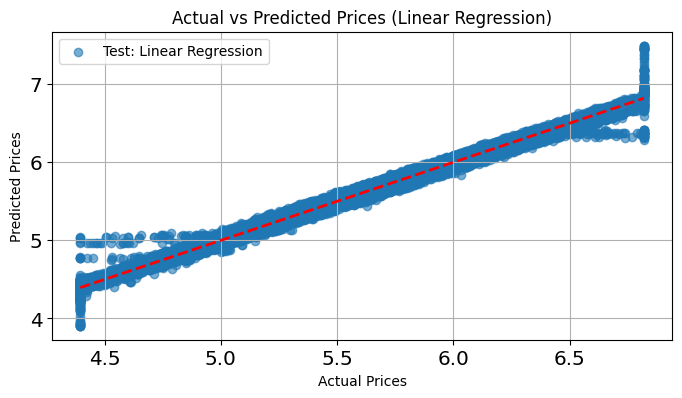

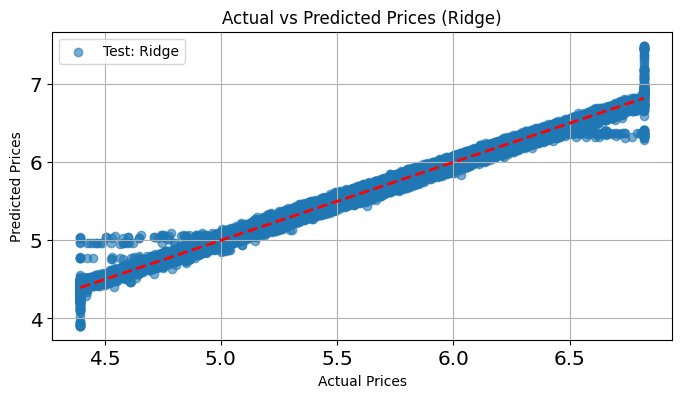

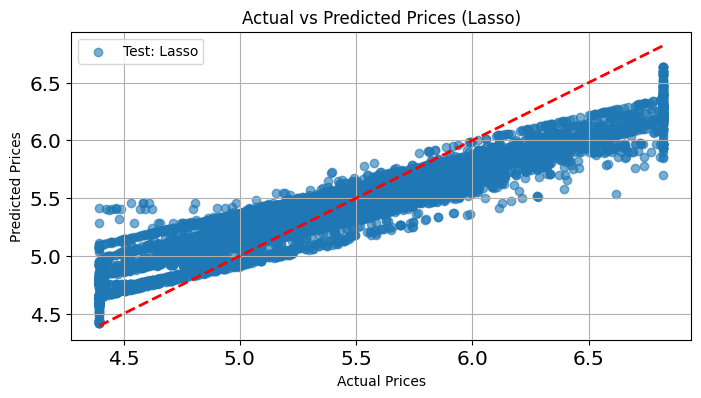

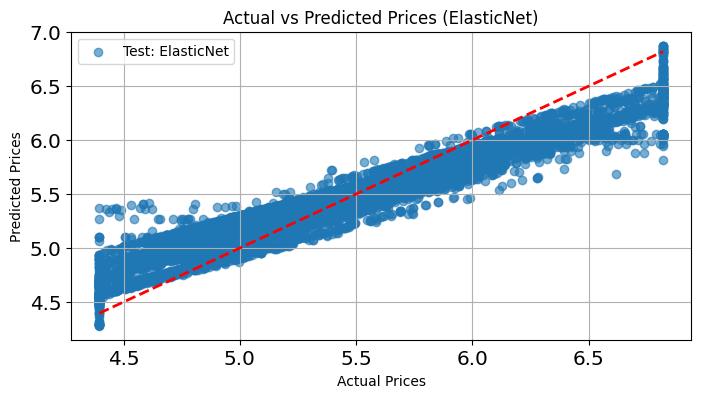

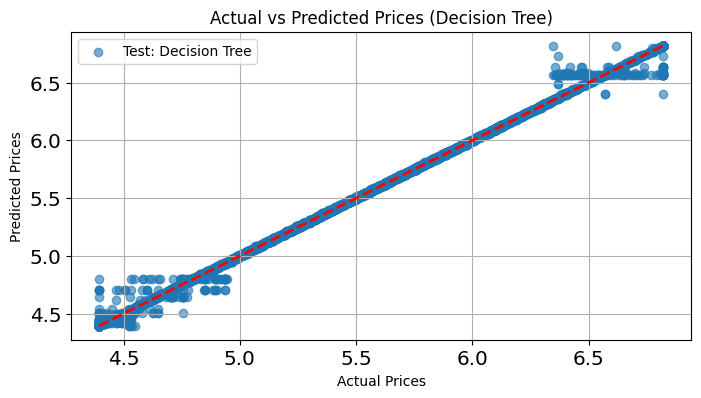

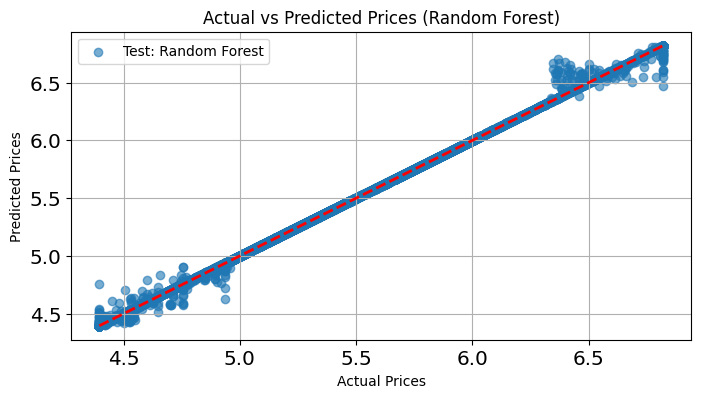

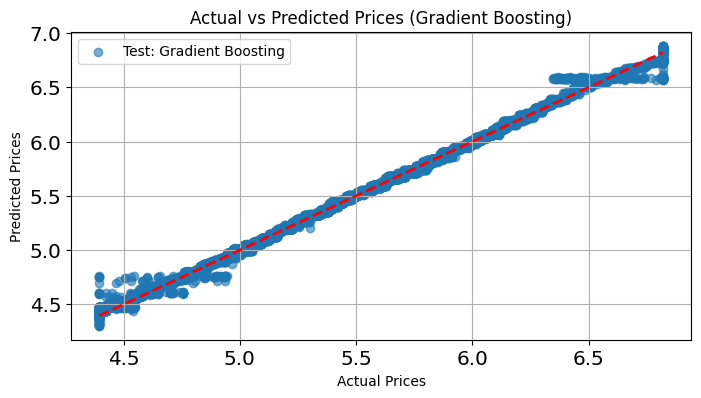

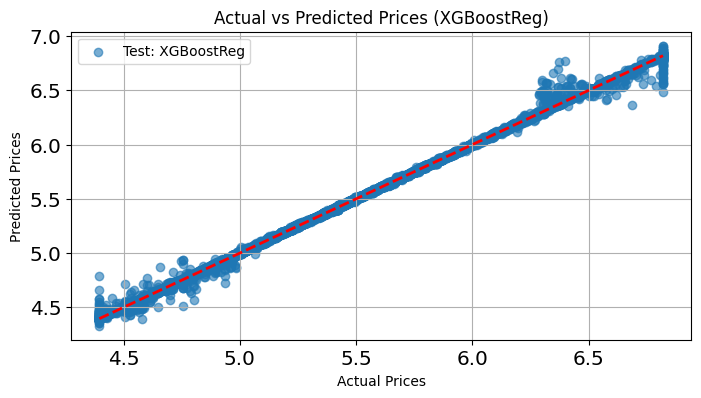

                   Train MSE  Test MSE  Train R2   Test R2
Linear Regression   0.006784  0.006891  0.978794  0.978651
Ridge               0.006784  0.006890  0.978793  0.978652
Lasso               0.069947  0.069783  0.781356  0.783791
ElasticNet          0.043691  0.043685  0.863428  0.864650
Decision Tree       0.000499  0.000599  0.998439  0.998146
Random Forest       0.000045  0.000319  0.999860  0.999011
Gradient Boosting   0.000898  0.000947  0.997194  0.997065
XGBoostReg          0.000162  0.000496  0.999494  0.998464


In [ ]:
# model initiation
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoostReg": XGBRegressor(random_state=42, n_estimators=100)
}

results = {}

for name, model in models.items():
    if name == "XGBoostReg":
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Evaluation
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results[name] = {
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train R2": train_r2,
        "Test R2": test_r2,
    }

   # Visualization
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, y_test_pred, alpha=0.6, label=f"Test: {name}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle="--")
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Actual vs Predicted Prices ({name})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Show Visualization
results_df = pd.DataFrame(results).T
print(results_df)

Model seperti Gradient Boosting, Random Forest, dan XGBoostReg menunjukkan distribusi titik yang sangat dekat dengan garis diagonal (garis merah putus-putus), yang mengindikasikan performa prediksi yang sangat akurat. Sementara itu, model berbasis linear seperti Linear Regression, Ridge, dan Lasso menunjukkan penyimpangan yang lebih besar, terutama pada bagian ujung distribusi nilai aktual. Hal ini menunjukkan bahwa model linear kurang mampu menangkap kompleksitas pola data dibandingkan model berbasis ensemble atau pohon keputusan seperti Gradient Boosting dan Random Forest. Secara keseluruhan, model Gradient Boosting tampaknya memberikan hasil terbaik dengan titik-titik yang hampir sempurna mengikuti garis diagonal, menandakan prediksi yang hampir identik dengan nilai aktual.

##J. Measurement Comparison

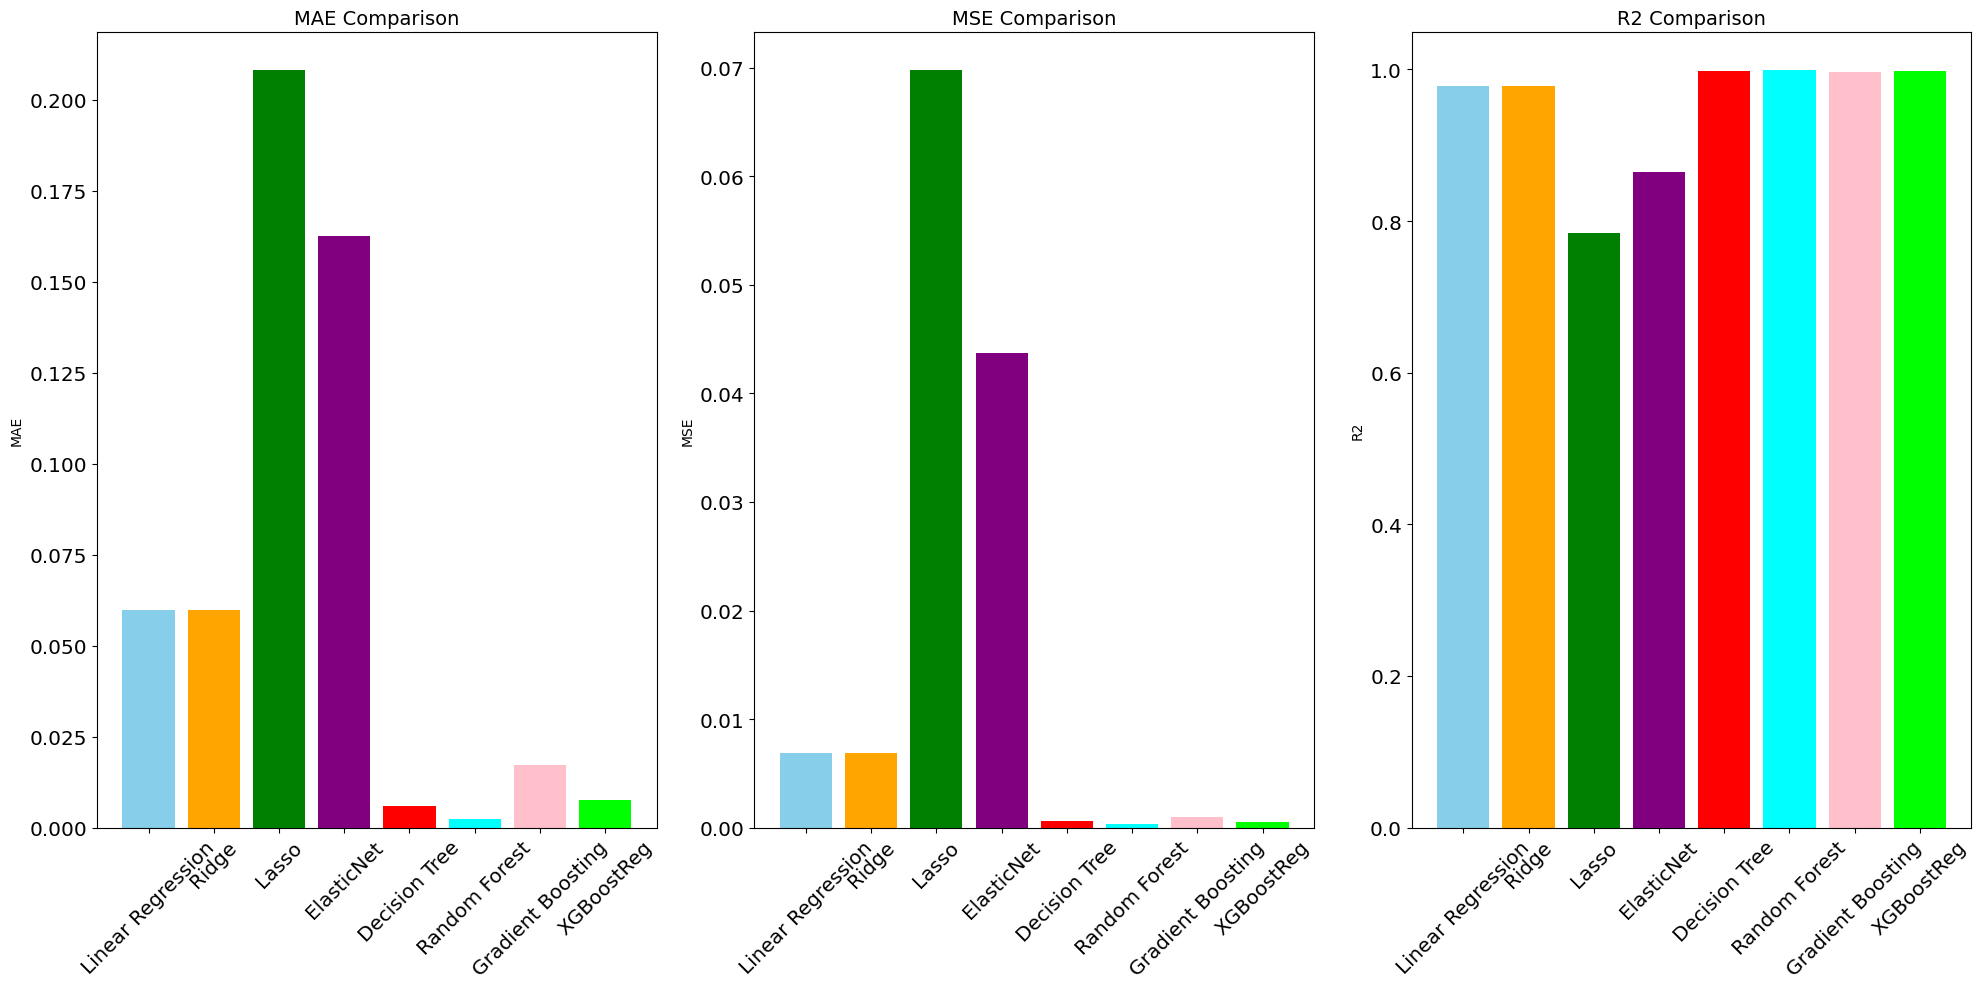

In [ ]:
# Evaluate models
results = {}
for model_name, model in models.items():
    if model_name == "XGBoostReg":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MAE": mae, "MSE": mse, "R2": r2}

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Visualization
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

metrics = ["MAE", "MSE", "R2"]
colors = ['skyblue', 'orange', 'green', 'purple', 'red', 'cyan', 'pink', 'lime']
for i, metric in enumerate(metrics):
    ax[i].bar(results_df.index, results_df[metric], color=colors)
    ax[i].set_title(f"{metric} Comparison", fontsize=14)
    ax[i].set_ylabel(metric)
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Dari grafik MAE dan MSE, terlihat bahwa model Lasso dan ElasticNet memiliki error yang jauh lebih tinggi dibandingkan model lainnya, menunjukkan underfitting. Sebaliknya, model ensemble seperti XGBoostReg, Gradient Boosting, dan Random Forest memiliki MAE dan MSE yang sangat kecil, mencerminkan akurasi prediksi yang tinggi. Pada grafik R², hampir semua model (kecuali Lasso dan ElasticNet) mendekati nilai 1, dengan XGBoostReg, Gradient Boosting, dan Random Forest menonjol sebagai model dengan performa terbaik. Model Decision Tree, meskipun memiliki R² tinggi, cenderung menunjukkan overfitting karena error yang relatif kecil hanya pada data train. Secara keseluruhan, XGBoostReg adalah pilihan terbaik dengan kombinasi error terendah dan R² tertinggi.

In [ ]:
pip install shap

                       Feature  Importance
1             price_per_person    0.528395
3              person_capacity    0.452651
26                 Shared room    0.004415
15                       multi    0.001502
14             Entire home/apt    0.001373
11                         lng    0.001240
9                   rest_index    0.001201
12           host_is_superhost    0.001141
13                         biz    0.000930
8              attr_index_norm    0.000924
6                   metro_dist    0.000866
10                         lat    0.000846
2                     bedrooms    0.000716
5                         dist    0.000710
4   guest_satisfaction_overall    0.000710
18              kota_barcelona    0.000558
16              kota_amsterdam    0.000516
0           cleanliness_rating    0.000503
27                Private room    0.000380
23                  kota_paris    0.000211
25                 kota_vienna    0.000075
20               kota_budapest    0.000061
24         

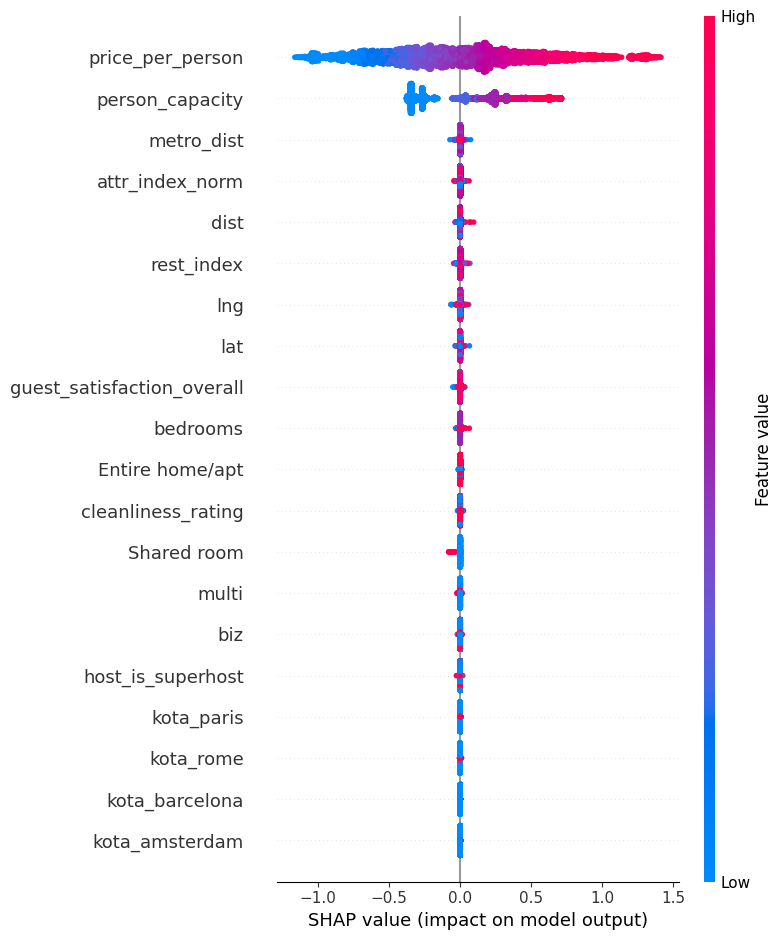

ValueError: Could not find feature named: Feature_0

In [ ]:
import pandas as pd
import shap
import xgboost as xgb
import numpy as np

# Training XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)

# Feature Importance
importance = model.feature_importances_

# Menampilkan Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Membuat object explainer SHAP untuk model XGBoost
explainer = shap.Explainer(model)  # Ganti xgb_model dengan model

# Menghitung nilai SHAP untuk data uji
shap_values = explainer(X_test)

# Visualisasi summary plot untuk melihat pengaruh fitur terhadap prediksi
shap.summary_plot(shap_values, X_test)

# Visualisasi dependence plot untuk satu fitur tertentu
shap.dependence_plot("Feature_0", shap_values.values, X_test)

# Visualisasi force plot untuk sebuah prediksi tertentu
shap.initjs()
shap.force_plot(shap_values[0].base_values, shap_values[0].values, X_test.iloc[0])

#Business Insight

Dari hasil evaluasi, terlihat bahwa harga per orang adalah faktor kunci dalam pengambilan keputusan pelanggan, sehingga penyesuaian strategi harga dapat memberikan dampak besar terhadap daya tarik listing. Kapasitas akomodasi juga menjadi peluang, terutama untuk menarik kelompok besar atau keluarga. Walaupun tidak sepenting harga, kualitas layanan seperti kebersihan dan reputasi host tetap penting untuk meningkatkan loyalitas pelanggan. Selain itu, lokasi yang strategis, seperti dekat transportasi umum, dapat menambah daya tarik listing tertentu.

#Rekomendasi dan Action Items

Sebagai rekomendasi, perusahaan dapat mengoptimalkan strategi harga dengan memberikan diskon dinamis berdasarkan musim atau permintaan untuk meningkatkan daya tarik listing. Promosikan listing dengan kapasitas besar untuk memenuhi kebutuhan kelompok pelanggan tertentu. Selain itu, edukasi host untuk meningkatkan kualitas layanan, seperti kebersihan dan menjadi superhost, agar dapat meningkatkan tingkat kepuasan pelanggan. Fokuskan pemasaran pada properti yang berada di lokasi strategis untuk menarik lebih banyak pelanggan yang mempertimbangkan kemudahan akses.